In [1]:
# OM 
import numpy as np #linear algebra
import pandas as pd #data manipulation
import matplotlib.pyplot as plt #data viz
from matplotlib.gridspec import GridSpec #data viz
from matplotlib.animation import FuncAnimation #animation
import seaborn as sns #data viz
#data preprocessing
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA #principle component analysis
from IPython.display import HTML #display gif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE #balance classes
import optuna
#models to try out
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import graphviz #graph of model
#metrics
from sklearn import metrics
#shap
import shap
import warnings #warnings
warnings.filterwarnings('ignore') #Hides warning popups

In [2]:
!pip install ipywidgets

In [3]:
!pip install shap

In [4]:
data = pd.read_csv('HepatitisCdata.csv', index_col=0)
data.head(100)


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0=Blood Donor,40,m,45.0,74.2,20.9,29.1,12.0,9.10,6.29,92.0,24.1,74.1
97,0=Blood Donor,40,m,39.1,66.5,33.3,32.9,14.8,7.87,4.91,88.0,18.5,68.8
98,0=Blood Donor,40,m,45.1,63.4,39.6,31.4,19.7,11.31,4.74,91.0,18.2,81.1
99,0=Blood Donor,40,m,45.4,52.9,41.3,26.2,10.6,10.27,6.85,82.0,40.2,76.6


In [5]:
# Now we are seeing the data by observing each column:
# Category: The target feature. values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'
# Age: age of the patient in years
# Sex: sex of the patient ('f'=female, 'm'=male)
# ALB: amount of albumin in patient's blood
# ALP: amount of alkaline phosphatase in patient's blood
# ALT: amount of alanine transaminase in patient's blood
# AST: amount of aspartate aminotransferase in patient's blood
# BIL: amount of bilirubin in patient's blood
# CHE: amount of cholinesterase in patient's blood
# CHOL: amount of cholesterol in patient's blood
# CREA: amount of creatine in patient's blood
# GGT: amount of gamma-glutamyl transferase in patient's blood
# PROT: amount of protien in patient's blood

## Exploratory Data Analysis (EDA)

In [6]:
data.shape

(615, 13)

In [7]:
data.describe().columns

Index(['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT',
       'PROT'],
      dtype='object')

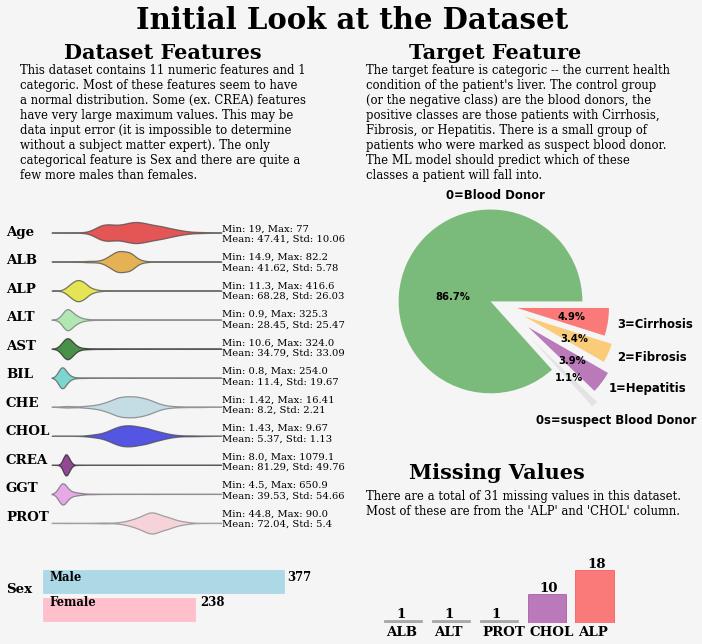

In [8]:
#Visualizes Basic Data Statistics
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=16, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')

ax1_1 = fig.add_subplot(gs[1:2, 1:4]) #top left
ax1_2 = fig.add_subplot(gs[2:3, 1:4])
ax1_3 = fig.add_subplot(gs[3:4, 1:4])
ax1_4 = fig.add_subplot(gs[4:5, 1:4])
ax1_5 = fig.add_subplot(gs[5:6, 1:4])
ax1_6 = fig.add_subplot(gs[6:7, 1:4])
ax1_7 = fig.add_subplot(gs[7:8, 1:4])
ax1_8 = fig.add_subplot(gs[8:9, 1:4])
ax1_9 = fig.add_subplot(gs[9:10, 1:4])
ax1_10 = fig.add_subplot(gs[10:11, 1:4])
ax1_11 = fig.add_subplot(gs[11:12, 1:4])



ax2 = fig.add_subplot(gs[13:15, 1:5]) #bottom left
ax3 = fig.add_subplot(gs[:8, 6:]) #top right
ax4 = fig.add_subplot(gs[13:15, 6:]) #bottom right

# axes list
axes = [ ax1_1, ax1_2, ax1_3, ax1_4, ax1_5, ax1_6,
        ax1_7, ax1_8, ax1_9, ax1_10, ax1_11, ax2, ax3, ax4]


# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
    
    
#------------------------------------------------------------    
#Plots violin charts of numeric columns in top left
top_left_axes = [ax1_1, ax1_2, ax1_3, ax1_4, ax1_5, ax1_6,
        ax1_7, ax1_8, ax1_9, ax1_10, ax1_11]
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green', 'turquoise', 'lightblue',
          'blue', 'purple', 'violet', 'pink']
y = 0.805
for ax, color, column in zip(top_left_axes, colors, list(data.describe().columns)):
    sns.violinplot(x=column, y=None, data=data, ax=ax, inner=None, color=color)
    ax.collections[::2][0].set_alpha(0.75)
    fig.text(0.07, y, column,
            {'font':'Serif', 'weight':'bold','color': 'black', 'size':16})
    stats_text = "Min: {}, Max: {}\nMean: {}, Std: {}".format(round(data[column].min(), 2),
                                                              round(data[column].max(), 2),
                                                              round(data[column].mean(), 2),
                                                              round(data[column].std(), 2))
    fig.text(0.22, y-0.01, stats_text,
            {'font':'Serif', 'weight':'normal','color': 'black', 'size':12})
    y-=0.0475
#ax1 title
fig.text(0.11, 1.1, 'Dataset Features', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
fig.text(0.08, 0.9, "This dataset contains 11 numeric features and 1\ncategoric." +\
         " Most of these features seem to have\na normal distribution. " +\
         "Some (ex. CREA) features\nhave very large maximum values. " +\
         "This may be\ndata input error (it is impossible to determine\nwithout a subject matter expert). " +\
         "The only\ncategorical feature is Sex and there are quite a\nfew more males than females.",
        {'font':'Serif', 'weight':'normal','color': 'black', 'size':14})


#------------------------------------------------------------
# plots sex in bottom left
sex_data = data.groupby('Sex').Sex.count()
ax2_plot = ax2.barh(sex_data.index, sex_data.values)
for i, rect in enumerate(ax2_plot):
    if i == 0:
        rect.set_color('pink')
    else:
        rect.set_color('lightblue')
        

fig.text(0.07, 0.21, 'Sex', {'font':'Serif', 'weight':'bold','color': 'black', 'size':16})
fig.text(0.1, 0.23, 'Male', {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(0.1, 0.1875, 'Female', {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(0.265, 0.23, sex_data['m'], {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(0.205, 0.1875, sex_data['f'], {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
        
    
#------------------------------------------------------------    
#plots split of target feature in pie chart
ax3_plot = ax3.pie(data.groupby('Category').Category.count().values, 
                   labels=data.groupby('Category').Category.count().index,
                    autopct='%1.1f%%', explode=[0.1, 0.5, 0.4, 0.3, 0.2], 
                   colors=['green', 'lightgrey', 'purple', 'orange', 'red'])

for piece in ax3_plot[0]:
    piece.set_alpha(0.5)

for i, text in enumerate(ax3_plot[1]):
    text.set_weight('bold')
    text.set_size(14)
    if i == 0:
        text.set_y(1.2)
        text.set_x(0.5)
    if i == 1:
        text.set_y(-1.25)
        text.set_x(0.4)
for i, text in enumerate(ax3_plot[2]):
    text.set_weight('bold')
    text.set_size(12)
    if i == 0:
        text.set_y(0.1)
        text.set_x(-0.5)
    
fig.text(0.35, 1.1, 'Target Feature',  {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
fig.text(0.32, 0.9,
        "The target feature is categoric -- the current health\ncondition of the patient's liver. " +\
         "The control group\n(or the negative class) are the blood donors, the\npositive classes " +\
         "are those patients with Cirrhosis,\nFibrosis, or Hepatitis. There is a small group of " +\
         "\npatients who were marked as suspect blood donor.\nThe ML model should predict which of these\n" +\
         "classes a patient will fall into.",
        {'font':'Serif', 'weight':'normal','color': 'black', 'size':14})
    
    
    
#------------------------------------------------------------    
#plot null values in barchart
null_data = data.isnull().sum()[data.isnull().sum() > 0].sort_values()
ax4_plot = ax4.bar(null_data.index, null_data.values)
for i, rect in enumerate(ax4_plot):
    height = rect.get_height()
    ax4.text((rect.get_x() + (rect.get_width() / 2.)) - 0.35, -4, null_data.index[i], 
           {'font':'Serif', 'weight':'bold','color': 'black', 'size':16})
    ax4.text((rect.get_x() + (rect.get_width() / 2.)) - 0.15, 1. + height, null_data.values[i], 
           {'font':'Serif', 'weight':'bold','color': 'black', 'size':16})
    if i < 3:
        rect.set_color('darkgrey')
    elif i == 3:
        rect.set_color('purple')
        rect.set_alpha(0.5)
    else:
        rect.set_color('red')
        rect.set_alpha(0.5)
fig.text(0.35, 0.4, 'Missing Values', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
fig.text(0.32, 0.34,
        "There are a total of 31 missing values in this dataset.\n" +\
         "Most of these are from the 'ALP' and 'CHOL' column.",
        {'font':'Serif', 'weight':'normal','color': 'black', 'size':14})
                
#-----------------------------------------------------------------    
fig.text(0.16,1.15,'Initial Look at the Dataset', {'font':'Serif', 'weight':'bold','color': 'black', 'size':35})    
plt.show()

## Univariate Analysis and Visualization of Dataset Features

In [9]:
#maps target feature 
target_map = {'0=Blood Donor': 'Healthy',
             '0s=suspect Blood Donor': 'Healthy', #suspects are binned with blood donors for simplicity
             '1=Hepatitis': 'Hepatitis',
             '2=Fibrosis': 'Fibrosis',
             '3=Cirrhosis': 'Cirrhosis'}


data['Category'] = data.Category.map(target_map)

In [10]:
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,Healthy,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,Healthy,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,Healthy,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,Healthy,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,Healthy,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


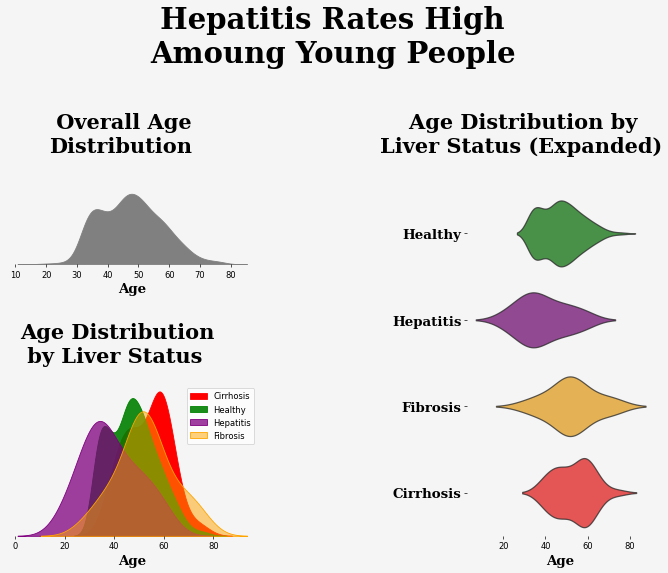

In [11]:
#plots univariate analysis of age 
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 7:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)



#-------Ax 1------------------------------------------------
sns.kdeplot( data=data['Age'], ax=ax1, shade=True, color='grey', alpha=1)
ax1.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

#-------Ax 2------------------------------------------------

sns.kdeplot(data=data[data.Category=='Cirrhosis']['Age'], ax=ax2, shade=True, color='red', alpha=1, label='Cirrhosis')
sns.kdeplot(data=data[data.Category=='Healthy']['Age'], ax=ax2, shade=True, color='green', alpha=0.9, label='Healthy')
sns.kdeplot(data=data[data.Category=='Hepatitis']['Age'], ax=ax2, shade=True, color='purple', alpha=0.75, label='Hepatitis')
sns.kdeplot(data=data[data.Category=='Fibrosis']['Age'], ax=ax2, shade=True, color='orange', alpha=0.5, label='Fibrosis')

ax2.legend()
ax2.set_xlabel('Age', fontdict= {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})


#-------Ax 3------------------------------------------------
ax3_plot = sns.violinplot(x='Age', y='Category', data=data,  ax=ax3, aspect=2, inner=None)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
#----------------------------------------------------------------------------
#axes titles
#ax1
fig.text(0.08, 0.75, " Overall Age\nDistribution",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.06, 0.4, "Age Distribution\n by Liver Status",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.31, 0.75, "    Age Distribution by\nLiver Status (Expanded)",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})

fig.text(0.15, 0.9, " Hepatitis Rates High\nAmoung Young People",
        {'font':'Serif', 'fontsize':35,'fontweight':'bold', 'color':'black'})#title

plt.show()

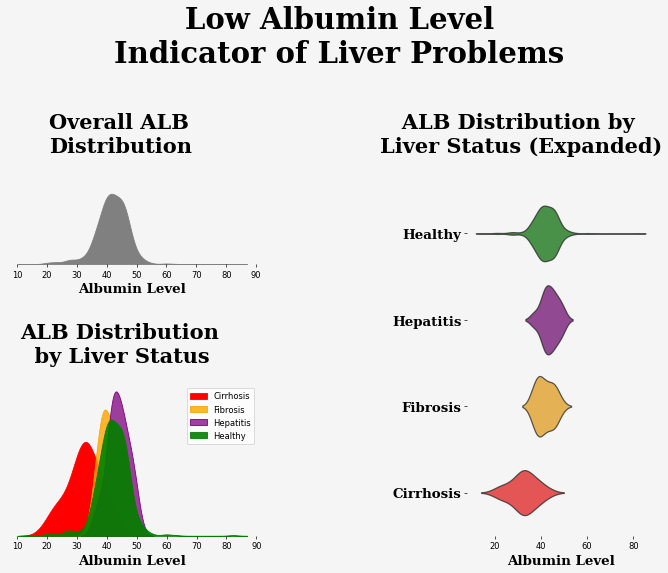

In [12]:
#plots univariate analysis of ALB 
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 7:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)



#-------Ax 1------------------------------------------------
sns.kdeplot( data=data['ALB'], ax=ax1, shade=True, color='grey', alpha=1)
ax1.set_xlabel('Albumin Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

#-------Ax 2------------------------------------------------
sns.kdeplot( data=data[data.Category=='Cirrhosis']['ALB'], ax=ax2, shade=True, color='red', alpha=1, label='Cirrhosis')
sns.kdeplot( data=data[data.Category=='Fibrosis']['ALB'], ax=ax2, shade=True, color='orange', alpha=0.8, label='Fibrosis')
sns.kdeplot( data=data[data.Category=='Hepatitis']['ALB'], ax=ax2, shade=True, color='purple', alpha=0.75, label='Hepatitis')
sns.kdeplot(data=data[data.Category=='Healthy']['ALB'], ax=ax2, shade=True, color='green', alpha=0.9, label='Healthy')


ax2.legend()
ax2.set_xlabel('Albumin Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})


#-------Ax 3------------------------------------------------
ax3_plot = sns.violinplot(x='ALB', y='Category', data=data,  ax=ax3, aspect=2, inner=None)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel('Albumin Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
#-------------------------------------------------------------------
#axes titles
#ax1
fig.text(0.08, 0.75, "Overall ALB\nDistribution",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.06, 0.4, "ALB Distribution\n  by Liver Status",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.31, 0.75, "   ALB Distribution by\nLiver Status (Expanded)",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})

fig.text(0.125, 0.9, "       Low Albumin Level\nIndicator of Liver Problems",
        {'font':'Serif', 'fontsize':35,'fontweight':'bold', 'color':'black'})#title

plt.show()

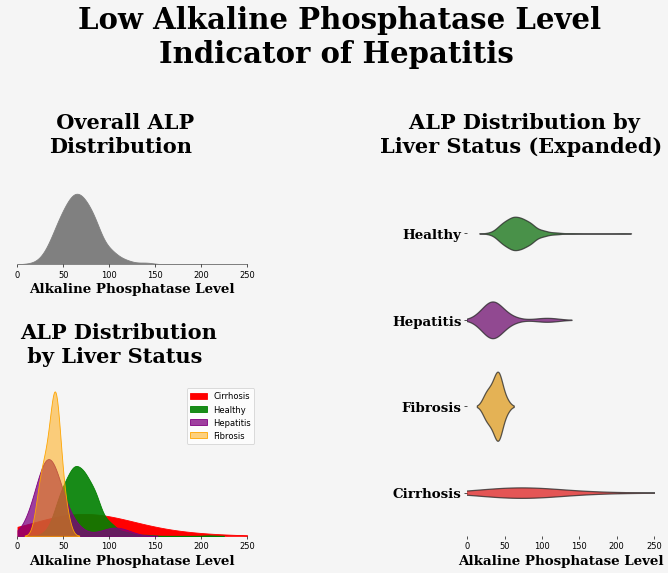

In [13]:
#plots univariate analysis of ALP 
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 7:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

#-------Ax 1------------------------------------------------
sns.kdeplot( data=data['ALP'], ax=ax1, shade=True, color='grey', alpha=1, clip=[0, 250])
ax1.set_xlabel('Alkaline Phosphatase Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

#-------Ax 2------------------------------------------------
sns.kdeplot( data=data[data.Category=='Cirrhosis']['ALP'], ax=ax2, shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0, 250])
sns.kdeplot(data=data[data.Category=='Healthy']['ALP'], ax=ax2, shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0, 250])
sns.kdeplot(data=data[data.Category=='Hepatitis']['ALP'], ax=ax2, shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0, 250])
sns.kdeplot( data=data[data.Category=='Fibrosis']['ALP'], ax=ax2, shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0, 250])

ax2.legend()
ax2.set_xlabel('Alkaline Phosphatase Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

#-------Ax 3------------------------------------------------
ax3_plot = sns.violinplot(x='ALP', y='Category', data=data,  ax=ax3, aspect=2, inner=None)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.set_xlim(0, 250)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel('Alkaline Phosphatase Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
#----------------------------------------------------
#axes titles
#ax1
fig.text(0.08, 0.75, " Overall ALP\nDistribution",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.06, 0.4, "ALP Distribution\n by Liver Status",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.31, 0.75, "    ALP Distribution by\nLiver Status (Expanded)",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})

fig.text(0.1, 0.9, "Low Alkaline Phosphatase Level\n        Indicator of Hepatitis",
        {'font':'Serif', 'fontsize':35,'fontweight':'bold', 'color':'black'})#title

plt.show()

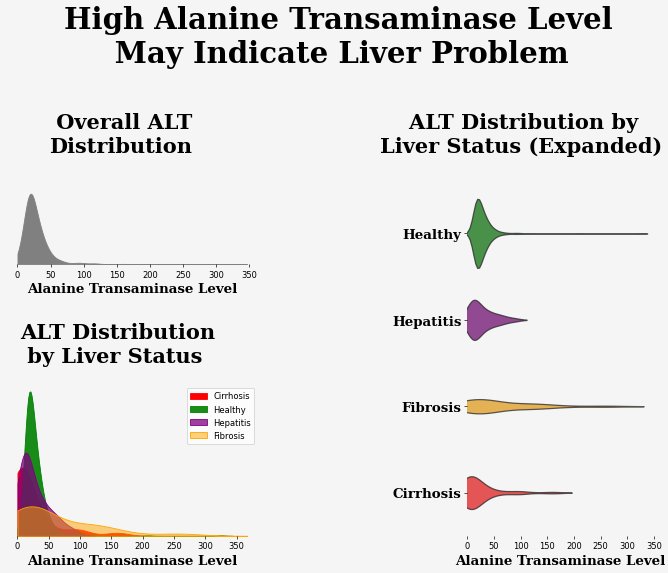

In [14]:
#plots univariate analysis of ALT
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 7:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

#-------Ax 1------------------------------------------------
sns.kdeplot( data=data['ALT'], ax=ax1, shade=True, color='grey', alpha=1, clip=[0,500])
ax1.set_xlabel('Alanine Transaminase Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

#-------Ax 2------------------------------------------------
sns.kdeplot(data=data[data.Category=='Cirrhosis']['ALT'], ax=ax2, shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,500])
sns.kdeplot( data=data[data.Category=='Healthy']['ALT'], ax=ax2, shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,500])
sns.kdeplot( data=data[data.Category=='Hepatitis']['ALT'], ax=ax2, shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,500])
sns.kdeplot( data=data[data.Category=='Fibrosis']['ALT'], ax=ax2, shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,500])

ax2.legend()
ax2.set_xlabel('Alanine Transaminase Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

#-------Ax 3------------------------------------------------
ax3_plot = sns.violinplot(x='ALT', y='Category', data=data,  ax=ax3, aspect=2, inner=None)
ax3.set_xlim(0,350)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel('Alanine Transaminase Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
#--------------------------------------------------------
#axes titles
#ax1
fig.text(0.08, 0.75, " Overall ALT\nDistribution",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.06, 0.4, "ALT Distribution\n by Liver Status",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.31, 0.75, "    ALT Distribution by\nLiver Status (Expanded)",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})

fig.text(0.09, 0.9, "High Alanine Transaminase Level\n     May Indicate Liver Problem",
        {'font':'Serif', 'fontsize':35,'fontweight':'bold', 'color':'black'})#title

plt.show()

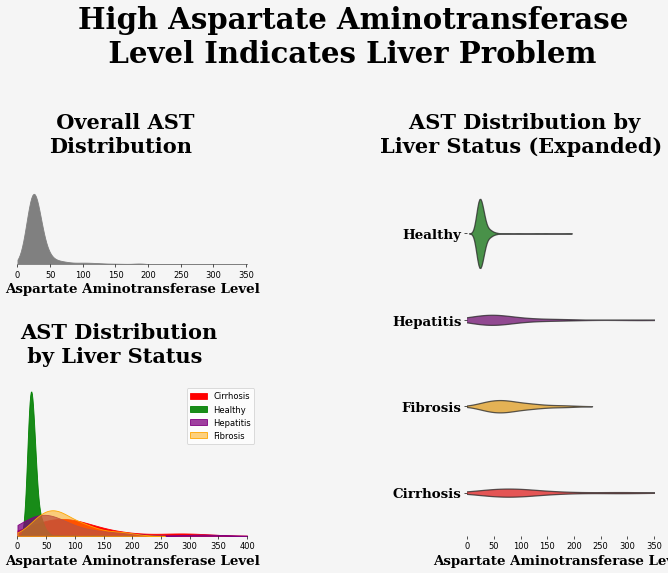

In [15]:
#plots univariate analysis of AST
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 7:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)



#-------Ax 1------------------------------------------------
sns.kdeplot( data=data['AST'], ax=ax1, shade=True, color='grey', alpha=1, clip=[0,400])
ax1.set_xlabel('Aspartate Aminotransferase Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

#-------Ax 2------------------------------------------------
sns.kdeplot( data=data[data.Category=='Cirrhosis']['AST'], ax=ax2, shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,400])
sns.kdeplot(data=data[data.Category=='Healthy']['AST'], ax=ax2, shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,400])
sns.kdeplot( data=data[data.Category=='Hepatitis']['AST'], ax=ax2, shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,400])
sns.kdeplot( data=data[data.Category=='Fibrosis']['AST'], ax=ax2, shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,400])

ax2.legend()
ax2.set_xlabel('Aspartate Aminotransferase Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})


#-------Ax 3------------------------------------------------
ax3_plot = sns.violinplot(x='AST', y='Category', data=data,  ax=ax3, aspect=2, inner=None)
ax3.set_xlim(0,350)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel('Aspartate Aminotransferase Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
#--------------------------------------------------------
#axes titles
#ax1
fig.text(0.08, 0.75, " Overall AST\nDistribution",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.06, 0.4, "AST Distribution\n by Liver Status",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.31, 0.75, "    AST Distribution by\nLiver Status (Expanded)",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})


fig.text(0.1, 0.9, "High Aspartate Aminotransferase\n   Level Indicates Liver Problem",
        {'font':'Serif', 'fontsize':35,'fontweight':'bold', 'color':'black'})#title


plt.show()

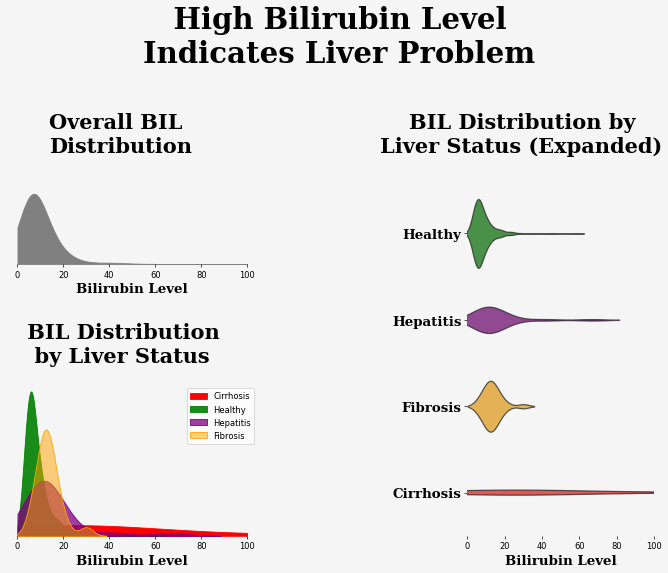

In [16]:
#plots univariate analysis of BIL
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 7:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)



#-------Ax 1------------------------------------------------
sns.kdeplot( data=data['BIL'], ax=ax1, shade=True, color='grey', alpha=1, clip=[0,100])
ax1.set_xlabel('Bilirubin Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

#-------Ax 2------------------------------------------------
sns.kdeplot( data=data[data.Category=='Cirrhosis']['BIL'], ax=ax2, shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,100])
sns.kdeplot( data=data[data.Category=='Healthy']['BIL'], ax=ax2, shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,100])
sns.kdeplot( data=data[data.Category=='Hepatitis']['BIL'], ax=ax2, shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,100])
sns.kdeplot( data=data[data.Category=='Fibrosis']['BIL'], ax=ax2, shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,100])

ax2.legend()
ax2.set_xlabel('Bilirubin Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})


#-------Ax 3------------------------------------------------
ax3_plot = sns.violinplot(x='BIL', y='Category', data=data,  ax=ax3, aspect=2, inner=None)
ax3.set_xlim(0,100)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel('Bilirubin Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
#--------------------------------------------------------
#axes titles
#ax1
fig.text(0.08, 0.75, "Overall BIL\nDistribution",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.06, 0.4, " BIL Distribution\n  by Liver Status",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.31, 0.75, "    BIL Distribution by\nLiver Status (Expanded)",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})

fig.text(0.145, 0.9, "   High Bilirubin Level\nIndicates Liver Problem",
        {'font':'Serif', 'fontsize':35,'fontweight':'bold', 'color':'black'})#title


plt.show()

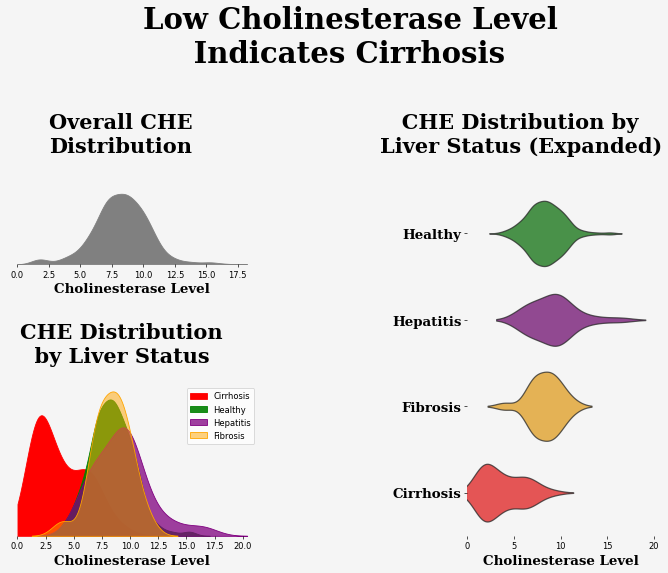

In [17]:
#plots univariate analysis of CHE
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 7:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)



#-------Ax 1------------------------------------------------
sns.kdeplot( data=data['CHE'], ax=ax1, shade=True, color='grey', alpha=1, clip=[0,400])
ax1.set_xlabel('Cholinesterase Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

#-------Ax 2------------------------------------------------
sns.kdeplot( data=data[data.Category=='Cirrhosis']['CHE'], ax=ax2, shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,400])
sns.kdeplot( data=data[data.Category=='Healthy']['CHE'], ax=ax2, shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,400])
sns.kdeplot( data=data[data.Category=='Hepatitis']['CHE'], ax=ax2, shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,400])
sns.kdeplot( data=data[data.Category=='Fibrosis']['CHE'], ax=ax2, shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,400])

ax2.legend()
ax2.set_xlabel('Cholinesterase Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})


#-------Ax 3------------------------------------------------
ax3_plot = sns.violinplot(x='CHE', y='Category', data=data,  ax=ax3, aspect=2, inner=None)
ax3.set_xlim(0,20)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel('Cholinesterase Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
#--------------------------------------------------------
#axes titles
#ax1
fig.text(0.08, 0.75, "Overall CHE\nDistribution",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.06, 0.4, "CHE Distribution\n  by Liver Status",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.31, 0.75, "   CHE Distribution by\nLiver Status (Expanded)",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})

fig.text(0.145, 0.9, "Low Cholinesterase Level\n     Indicates Cirrhosis",
        {'font':'Serif', 'fontsize':35,'fontweight':'bold', 'color':'black'})#title


plt.show()

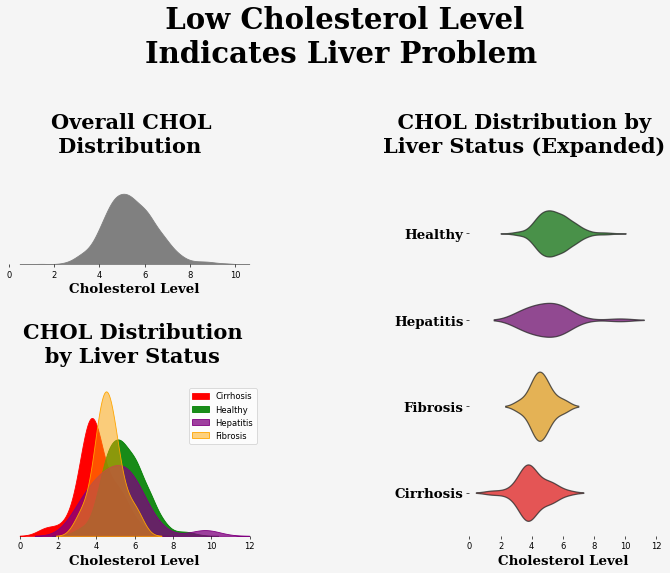

In [18]:
#plots univariate analysis of CHOL
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 7:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)



#-------Ax 1------------------------------------------------
sns.kdeplot(data=data['CHOL'], ax=ax1, shade=True, color='grey', alpha=1, clip=[0,400])
ax1.set_xlabel('Cholesterol Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

#-------Ax 2------------------------------------------------
sns.kdeplot( data=data[data.Category=='Cirrhosis']['CHOL'], ax=ax2, shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,400])
sns.kdeplot(data=data[data.Category=='Healthy']['CHOL'], ax=ax2, shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,400])
sns.kdeplot( data=data[data.Category=='Hepatitis']['CHOL'], ax=ax2, shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,400])
sns.kdeplot( data=data[data.Category=='Fibrosis']['CHOL'], ax=ax2, shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,400])

ax2.legend()
ax2.set_xlabel('Cholesterol Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})


#-------Ax 3------------------------------------------------
ax3_plot = sns.violinplot(x='CHOL', y='Category', data=data,  ax=ax3, aspect=2, inner=None)
ax3.set_xlim(0,12)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel('Cholesterol Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
#--------------------------------------------------------
#axes titles
#ax1
fig.text(0.08, 0.75, "Overall CHOL\n Distribution",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.06, 0.4, "CHOL Distribution\n   by Liver Status",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.31, 0.75, "  CHOL Distribution by\nLiver Status (Expanded)",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})


fig.text(0.145, 0.9, "  Low Cholesterol Level\nIndicates Liver Problem",
        {'font':'Serif', 'fontsize':35,'fontweight':'bold', 'color':'black'})#title

plt.show()

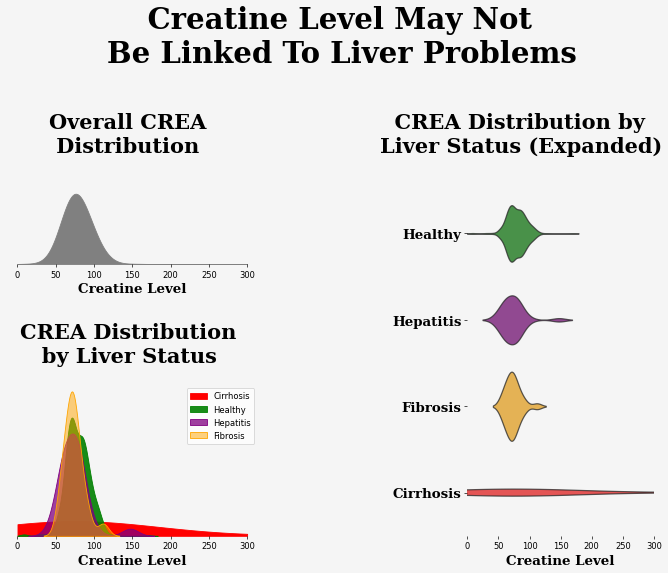

In [19]:
#plots univariate analysis of CREA
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 7:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)



#-------Ax 1------------------------------------------------
sns.kdeplot(data=data['CREA'], ax=ax1, shade=True, color='grey', alpha=1, clip=[0,300])
ax1.set_xlabel('Creatine Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

#-------Ax 2------------------------------------------------
sns.kdeplot( data=data[data.Category=='Cirrhosis']['CREA'], ax=ax2, shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,300])
sns.kdeplot( data=data[data.Category=='Healthy']['CREA'], ax=ax2, shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,300])
sns.kdeplot( data=data[data.Category=='Hepatitis']['CREA'], ax=ax2, shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,300])
sns.kdeplot( data=data[data.Category=='Fibrosis']['CREA'], ax=ax2, shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,300])

ax2.legend()
ax2.set_xlabel('Creatine Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})


#-------Ax 3------------------------------------------------
ax3_plot = sns.violinplot(x='CREA', y='Category', data=data,  ax=ax3, aspect=2, inner=None)
ax3.set_xlim(0,300)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel('Creatine Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
#--------------------------------------------------------
#axes titles
#ax1
fig.text(0.08, 0.75, "Overall CREA\n Distribution",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.06, 0.4, "CREA Distribution\n   by Liver Status",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.31, 0.75, "  CREA Distribution by\nLiver Status (Expanded)",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})


fig.text(0.12, 0.9, "    Creatine Level May Not\nBe Linked To Liver Problems",
        {'font':'Serif', 'fontsize':35,'fontweight':'bold', 'color':'black'})#title

plt.show()

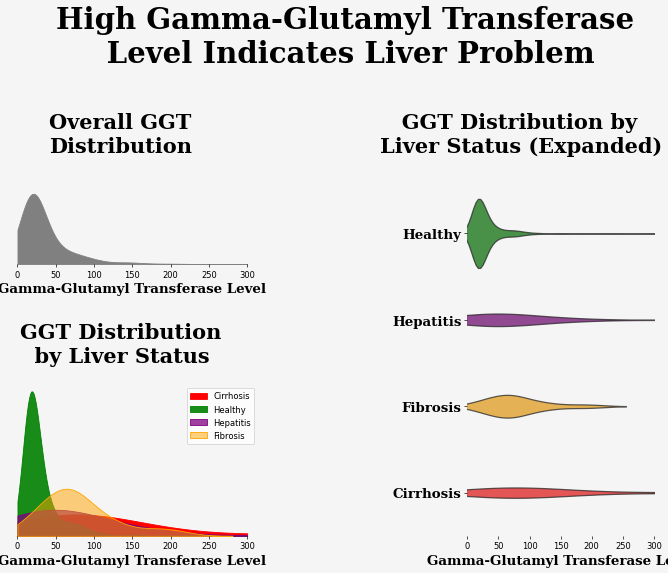

In [20]:
#plots univariate analysis of GGT
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 7:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)



#-------Ax 1------------------------------------------------
sns.kdeplot( data=data['GGT'], ax=ax1, shade=True, color='grey', alpha=1, clip=[0,300])
ax1.set_xlabel('Gamma-Glutamyl Transferase Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

#-------Ax 2------------------------------------------------
sns.kdeplot( data=data[data.Category=='Cirrhosis']['GGT'], ax=ax2, shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,300])
sns.kdeplot( data=data[data.Category=='Healthy']['GGT'], ax=ax2, shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,300])
sns.kdeplot(data=data[data.Category=='Hepatitis']['GGT'], ax=ax2, shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,300])
sns.kdeplot( data=data[data.Category=='Fibrosis']['GGT'], ax=ax2, shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,300])

ax2.legend()
ax2.set_xlabel('Gamma-Glutamyl Transferase Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})


#-------Ax 3------------------------------------------------
ax3_plot = sns.violinplot(x='GGT', y='Category', data=data,  ax=ax3, aspect=2, inner=None)
ax3.set_xlim(0,300)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel('Gamma-Glutamyl Transferase Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
#--------------------------------------------------------
#axes titles
#ax1
fig.text(0.08, 0.75, "Overall GGT\nDistribution",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.06, 0.4, "GGT Distribution\n  by Liver Status",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.31, 0.75, "   GGT Distribution by\nLiver Status (Expanded)",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})


fig.text(0.085, 0.9, "High Gamma-Glutamyl Transferase\n     Level Indicates Liver Problem",
        {'font':'Serif', 'fontsize':35,'fontweight':'bold', 'color':'black'})#title

plt.show()

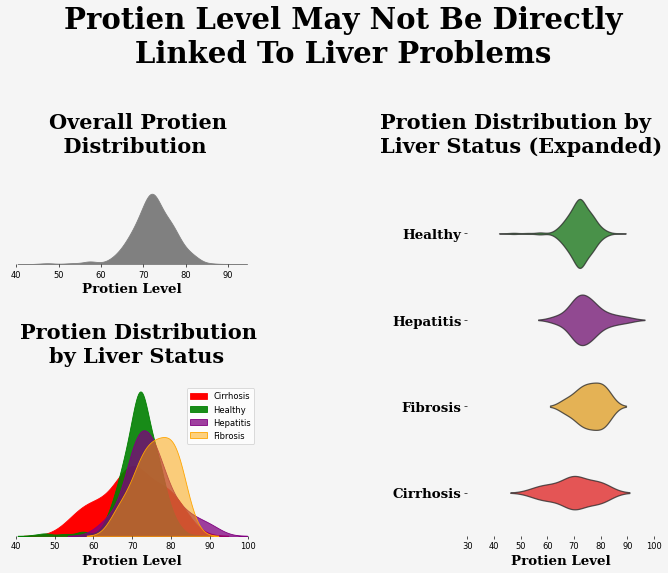

In [21]:
#plots univariate analysis of PROT
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 7:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)



#-------Ax 1------------------------------------------------
sns.kdeplot( data=data['PROT'], ax=ax1, shade=True, color='grey', alpha=1, clip=[0,300])
ax1.set_xlabel('Protien Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

#-------Ax 2------------------------------------------------
sns.kdeplot( data=data[data.Category=='Cirrhosis']['PROT'], ax=ax2, shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,300])
sns.kdeplot(data=data[data.Category=='Healthy']['PROT'], ax=ax2, shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,300])
sns.kdeplot( data=data[data.Category=='Hepatitis']['PROT'], ax=ax2, shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,300])
sns.kdeplot( data=data[data.Category=='Fibrosis']['PROT'], ax=ax2, shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,300])

ax2.legend()
ax2.set_xlabel('Protien Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})


#-------Ax 3------------------------------------------------
ax3_plot = sns.violinplot(x='PROT', y='Category', data=data,  ax=ax3, aspect=2, inner=None)
ax3.set_xlim(30,100)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel('Protien Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
#--------------------------------------------------------
#axes titles
#ax1
fig.text(0.08, 0.75, "Overall Protien\n  Distribution",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.06, 0.4, "Protien Distribution\n    by Liver Status",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.31, 0.75, "Protien Distribution by\nLiver Status (Expanded)",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})


#fig title
fig.text(0.09, 0.9, "Protien Level May Not Be Directly\n       Linked To Liver Problems",
        {'font':'Serif', 'fontsize':35,'fontweight':'bold', 'color':'black'})


plt.show()

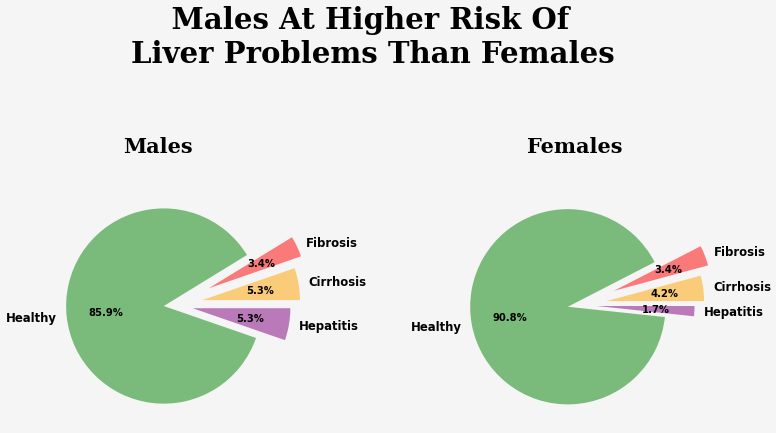

In [22]:
#plots univariate analysis of Sex
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=13, nrows=5, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[:, 0:5])
ax2 = fig.add_subplot(gs[:, 8:])


# axes list
axes = [ ax1,ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

#------------------------------------------------------------    
#ax1
ax1_plot = ax1.pie(data[data.Sex == 'm'].groupby('Category').Category.count().values, 
                   labels=data.groupby('Category').Category.count().index,
                    autopct='%1.1f%%', explode=[0.3,  0.4, 0.1, 0.2], 
                   colors=['orange', 'red', 'green', 'purple'])

for piece in ax1_plot[0]:
    piece.set_alpha(0.5)

for i, text in enumerate(ax1_plot[1]):
    text.set_weight('bold')
    text.set_size(14)

for i, text in enumerate(ax1_plot[2]):
    text.set_weight('bold')
    text.set_size(12)

    
fig.text(0.1, 0.75, 'Males',  {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
#------------------------------------------------------------    
#ax2
ax2_plot = ax2.pie(data[data.Sex == 'f'].groupby('Category').Category.count().values, 
                   labels=data.groupby('Category').Category.count().index,
                    autopct='%1.1f%%', explode=[0.3,  0.4, 0.1, 0.2], 
                   colors=['orange', 'red', 'green', 'purple'])

for piece in ax2_plot[0]:
    piece.set_alpha(0.5)

for i, text in enumerate(ax2_plot[1]):
    text.set_weight('bold')
    text.set_size(14)

for i, text in enumerate(ax2_plot[2]):
    text.set_weight('bold')
    text.set_size(12)

fig.text(0.38, 0.75, 'Females',  {'font':'Serif', 'weight':'bold','color': 'black', 'size':25}) 
#--------------------------------
fig.text(0.105, 0.9, '    Males At Higher Risk Of\nLiver Problems Than Females',
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':35}) 
plt.show()

In [23]:
data.groupby('Category').Category.count()

Category
Cirrhosis     30
Fibrosis      21
Healthy      540
Hepatitis     24
Name: Category, dtype: int64

## Bivariate Analysis and Visualization of Dataset Features

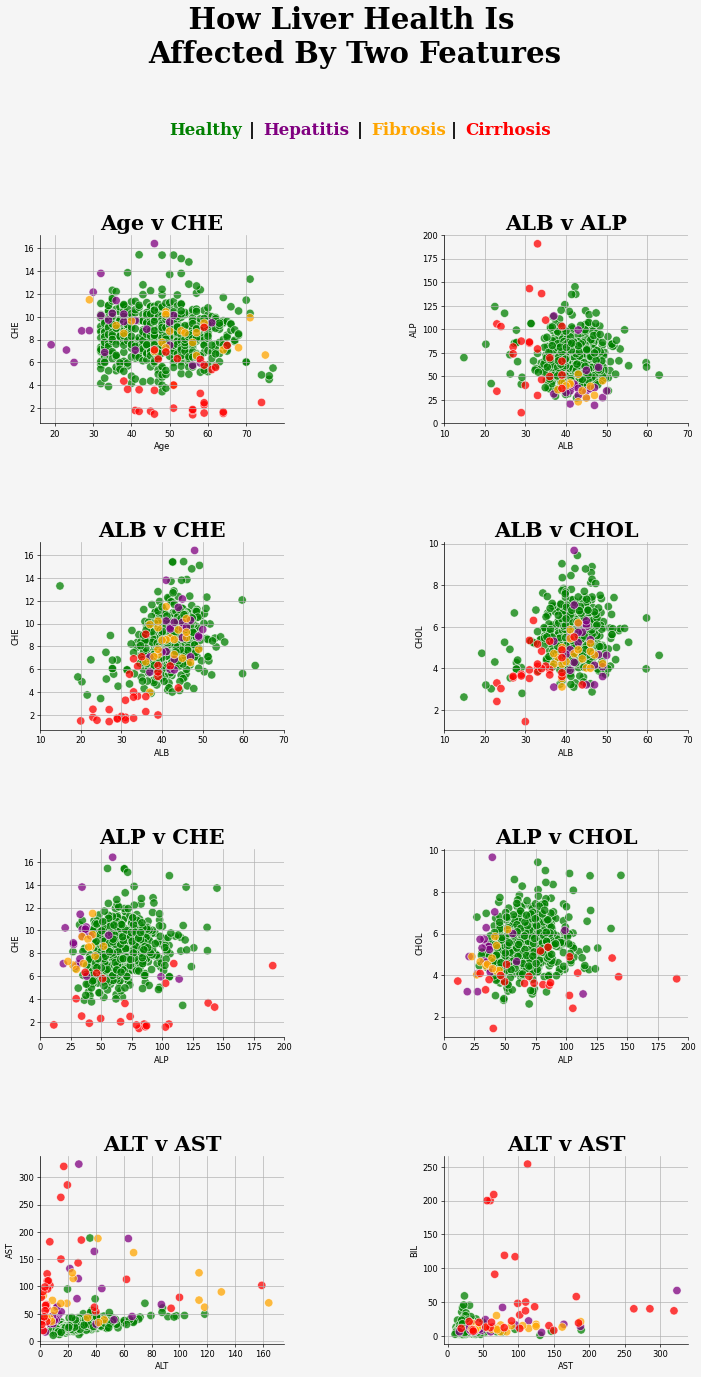

In [24]:
#plots bivariate data
fig = plt.figure(figsize = (24,24), dpi = 60)
gs = GridSpec(ncols=13, nrows=29, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[:5, :5])
ax2 = fig.add_subplot(gs[:5, 8:])
ax3 = fig.add_subplot(gs[8:13, :5])
ax4 = fig.add_subplot(gs[8:13, 8:])
ax5 = fig.add_subplot(gs[16:21, :5])
ax6 = fig.add_subplot(gs[16:21, 8:])
ax7 = fig.add_subplot(gs[24:, :5])
ax8 = fig.add_subplot(gs[24:, 8:])


# axes list
axes = [ ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.set_facecolor('#f5f5f5')
    ax.grid()
    
    for loc in ['right', 'top']:
        ax.spines[loc].set_visible(False)
        

#-------------------------------------------------------------------------------
#ax1 Age v CHE
sns.scatterplot(x='Age', y='CHE', hue='Category', data=data, ax=ax1, s=100, alpha=0.75, legend=None)
ax1.set_title('Age v CHE', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
#-------------------------------------------------------------------------------
#ax2 ALB v ALP
sns.scatterplot(x='ALB', y='ALP', hue='Category', data=data, ax=ax2, s=100, alpha=0.75, legend=None)
ax2.set_title('ALB v ALP', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax2.set_xlim(10, 70)
ax2.set_ylim(0,200)
#-------------------------------------------------------------------------------
#ax3 ALB v CHE
sns.scatterplot(x='ALB', y='CHE', hue='Category', data=data, ax=ax3, s=100, alpha=0.75, legend=None)
ax3.set_title('ALB v CHE', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax3.set_xlim(10, 70)
#-------------------------------------------------------------------------------
#ax4 ALB v CHOL
sns.scatterplot(x='ALB', y='CHOL', hue='Category', data=data, ax=ax4, s=100, alpha=0.75, legend=None)
ax4.set_title('ALB v CHOL', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax4.set_xlim(10, 70)
#-------------------------------------------------------------------------------
#ax5 ALP v CHE
sns.scatterplot(x='ALP', y='CHE', hue='Category', data=data, ax=ax5, s=100, alpha=0.75, legend=None)
ax5.set_title('ALP v CHE', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax5.set_xlim(0, 200)
#-------------------------------------------------------------------------------
#ax6 ALP v CHOL
sns.scatterplot(x='ALP', y='CHOL', hue='Category', data=data, ax=ax6, s=100, alpha=0.75, legend=None)
ax6.set_title('ALP v CHOL', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax6.set_xlim(0, 200)
#-------------------------------------------------------------------------------
#ax7 ALT v AST
sns.scatterplot(x='ALT', y='AST', hue='Category', data=data, ax=ax7, s=100, alpha=0.75, legend=None)
ax7.set_title('ALT v AST', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax7.set_xlim(0, 175)
#-------------------------------------------------------------------------------
#ax8 AST v BIL
sns.scatterplot(x='AST', y='BIL', hue='Category', data=data, ax=ax8, s=100, alpha=0.75, legend=None)
ax8.set_title('ALT v AST', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
#ax8.set_xlim(0, 175)


#-------------------------------------------
fig.text(0.1 + 0.04, 0.95, "Healthy", 
         {'font':'Serif', 'weight':'bold','color': 'green', 'size':20})
fig.text(0.155 + 0.04, 0.95, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.165 + 0.04, 0.95, "Hepatitis", 
         {'font':'Serif', 'weight':'bold','color': 'purple', 'size':20})
fig.text(0.23 + 0.04, 0.95, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.24 + 0.04, 0.95, "Fibrosis", 
         {'font':'Serif', 'weight':'bold','color': 'orange', 'size':20})
fig.text(0.295 + 0.04, 0.95, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.305 + 0.04, 0.95, "Cirrhosis", 
         {'font':'Serif', 'weight':'bold','color': 'red', 'size':20})


fig.text(0.125, 1, "    How Liver Health Is\nAffected By Two Features", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
plt.show()

##  Multivariate Analysis and Visualization with PCA

In [25]:
#creates lower dimension dataset to visualize multiple features at once
#first preprocess data
#sets Sex to 0 (m) or 1 (f)
gender_map = {'m': 0, 'f': 1}
data['Sex'] = data.Sex.map(gender_map)

#creates pipeline for data processing
ct = ColumnTransformer([
    ('scaler', StandardScaler(), [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
], remainder='passthrough')

knn_imp = KNNImputer(n_neighbors=5) # we use it for multivariate imputation
                                    # We are using this imputation because we 
                                    # are working with smaller dataset
                                    # Mostly it gives better result than mean and median
pipeline = Pipeline([
    ('scale', ct),
    ('impute', knn_imp)
])
# Since we are not training the model here so we have used here fit_transform 
# but if we train the model also then we can use fit only
#  So we have two kinds of pipeline:
#         1) .fit_transform
#         2) .fit
print(data.iloc[:, 1:])

# Now we put the data into the Input X data  pipeline
X = pipeline.fit_transform(data.iloc[:, 1:].values)
y = data.Category.values

# For data visualization we are using Feature extraction using PCA 
pca_1d = PCA(n_components=1)
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

X_1d = pca_1d.fit_transform(X).reshape(1,-1)[0]
X_2d = pca_2d.fit_transform(X).reshape(2, -1)
X_3d = pca_3d.fit_transform(X).reshape(3, -1)


     Age  Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA    GGT  \
1     32    0  38.5   52.5    7.7   22.1   7.5   6.93  3.23  106.0   12.1   
2     32    0  38.5   70.3   18.0   24.7   3.9  11.17  4.80   74.0   15.6   
3     32    0  46.9   74.7   36.2   52.6   6.1   8.84  5.20   86.0   33.2   
4     32    0  43.2   52.0   30.6   22.6  18.9   7.33  4.74   80.0   33.8   
5     32    0  39.2   74.1   32.6   24.8   9.6   9.15  4.32   76.0   29.9   
..   ...  ...   ...    ...    ...    ...   ...    ...   ...    ...    ...   
611   62    1  32.0  416.6    5.9  110.3  50.0   5.57  6.30   55.7  650.9   
612   64    1  24.0  102.8    2.9   44.4  20.0   1.54  3.02   63.0   35.9   
613   64    1  29.0   87.3    3.5   99.0  48.0   1.66  3.63   66.7   64.2   
614   46    1  33.0    NaN   39.0   62.0  20.0   3.56  4.20   52.0   50.0   
615   59    1  36.0    NaN  100.0   80.0  12.0   9.07  5.30   67.0   34.0   

     PROT  
1    69.0  
2    76.5  
3    79.3  
4    75.7  
5    68.7  
.. 

In [26]:
X

array([[-1.53361617, -0.54020751, -0.60692194, ..., -0.50228619,
        -0.56391342,  0.        ],
       [-1.53361617, -0.54020751,  0.07752215, ..., -0.43820313,
         0.82542973,  0.        ],
       [-1.53361617,  0.91410623,  0.24671058, ..., -0.11595686,
         1.34411784,  0.        ],
       ...,
       [ 1.65143725, -2.1849671 ,  0.73120471, ...,  0.45163601,
         1.84428138,  1.        ],
       [-0.1401553 , -1.49243674, -0.42850505, ...,  0.19164186,
        -0.19342191,  1.        ],
       [ 1.15377266, -0.97303898,  0.68736953, ..., -0.1013093 ,
        -0.74915917,  1.        ]])

In [27]:
y

array(['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 

In [28]:
# Part of working
import plotly.express as px

pca_trf=PCA(n_components=3)
X3d=pca_trf.fit_transform(X)
X3d


array([[ 0.45499727, -2.07405988, -0.98766239],
       [-1.11764443, -0.19667565, -0.63853426],
       [-1.05251727,  0.80404665, -1.6610313 ],
       ...,
       [ 3.90248444, -0.40441418, -1.16972797],
       [ 2.30982477, -1.03298465, -0.84135041],
       [ 1.46925587,  1.63476627,  0.59670488]])

In [29]:
y3d=y.astype(str)
fig=px.scatter_3d()

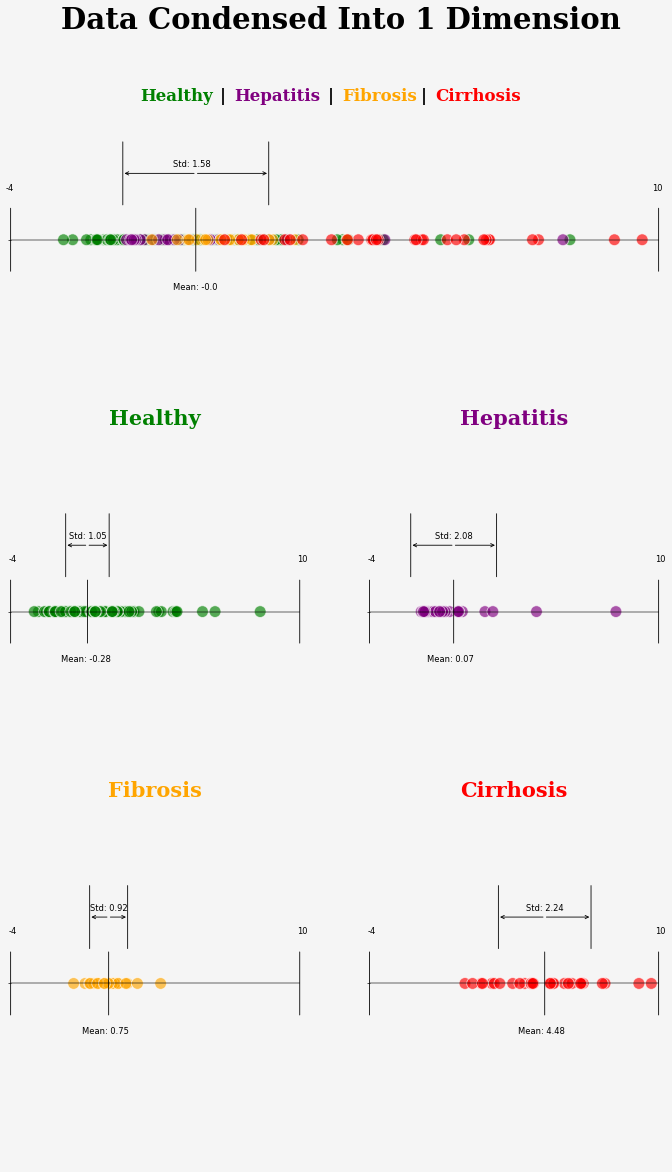

In [30]:
#1d data
fig = plt.figure(figsize = (24,24), dpi = 60)
gs = GridSpec(ncols=11, nrows=15, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[:5, :])
ax2 = fig.add_subplot(gs[5:10, :5])
ax3 = fig.add_subplot(gs[5:10, 6:])
ax4 = fig.add_subplot(gs[10:, :5])
ax5 = fig.add_subplot(gs[10:, 6:])
# axes list
axes = [ ax1,ax2,ax3,ax4, ax5]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    #ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    ax.set_yticks([0], [''])
    ax.set_xticks([])
    ax.grid(color='black', lw=2., alpha=0.35)
    ax.set_xlim(-4, 10)
    ax.annotate("", xy=(-4, -0.01), xytext=(-4, 0.01),
                xycoords='data', arrowprops=dict(arrowstyle='-'))
    ax.annotate("", xy=(10, -0.01), xytext=(10, 0.01),
                xycoords='data', arrowprops=dict(arrowstyle='-'))
    ax.text(-4.1, 0.015, '-4')
    ax.text(9.85, 0.015, '10')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
        
#-----------------------------------------------------------
#ax1
sns.scatterplot(x=X_1d, y=[0 for i in y], hue=y, s=200, alpha=0.65, ax=ax1, legend=False)
all_mean = X_1d.mean()
all_std = X_1d.std()
ax1.annotate("", xy=(all_mean, -0.01), xytext=(all_mean, 0.01),
            xycoords='data', arrowprops=dict(arrowstyle='-'))
ax1.text(all_mean - 0.5, -0.015, 'Mean: {}'.format(round(all_mean,2)))

ax1.annotate("", xy=(all_mean, 0.02), xytext=(all_mean-all_std, 0.02),
            arrowprops=dict(arrowstyle='<-'))
ax1.annotate("", xy=(all_mean-all_std, 0.01), xytext=(all_mean-all_std, 0.03),
            arrowprops=dict(arrowstyle='-'))
ax1.annotate("", xy=(all_mean, 0.02), xytext=(all_mean+all_std, 0.02),
            arrowprops=dict(arrowstyle='<-'))
ax1.annotate("", xy=(all_mean+all_std, 0.01), xytext=(all_mean+all_std, 0.03),
            arrowprops=dict(arrowstyle='-'))
ax1.text(all_mean - 0.5, 0.022, 'Std: {}'.format(round(all_std,2)))
#-----------------------------------------------------------
#ax2
healthy_ix  = [i for i in range(len(y)) if y[i] == 'Healthy']
sns.scatterplot(x=X_1d[healthy_ix], y=[0 for i in healthy_ix],  s=200, 
                c=['green' for i in healthy_ix], alpha=0.65, ax=ax2, legend=False)
healthy_mean = X_1d[healthy_ix].mean()
healthy_std = X_1d[healthy_ix].std()
ax2.annotate("", xy=(healthy_mean, -0.01), xytext=(healthy_mean, 0.01),
            xycoords='data', arrowprops=dict(arrowstyle='-'))
ax2.text(healthy_mean - 1.3, -0.015, 'Mean: {}'.format(round(healthy_mean,2)))

ax2.annotate("", xy=(healthy_mean, 0.02), xytext=(healthy_mean-healthy_std, 0.02),
            arrowprops=dict(arrowstyle='<-'))
ax2.annotate("", xy=(healthy_mean-healthy_std, 0.01), xytext=(healthy_mean-healthy_std, 0.03),
            arrowprops=dict(arrowstyle='-'))
ax2.annotate("", xy=(healthy_mean, 0.02), xytext=(healthy_mean+healthy_std, 0.02),
            arrowprops=dict(arrowstyle='<-'))
ax2.annotate("", xy=(healthy_mean+healthy_std, 0.01), xytext=(healthy_mean+healthy_std, 0.03),
            arrowprops=dict(arrowstyle='-'))
ax2.text(healthy_mean - 0.9, 0.022, 'Std: {}'.format(round(healthy_std,2)))

ax2.set_title('Healthy', {'font':'Serif', 'weight':'bold','color': 'green', 'size':25})
#-----------------------------------------------------------
#ax3
hepatitis_ix  = [i for i in range(len(y)) if y[i] == 'Hepatitis']
sns.scatterplot(x=X_1d[hepatitis_ix], y=[0 for i in hepatitis_ix],  s=200,
                c=['purple' for i in hepatitis_ix], alpha=0.65, ax=ax3, legend=False)
hepatitis_mean = X_1d[hepatitis_ix].mean()
hepatitis_std = X_1d[hepatitis_ix].std()
ax3.annotate("", xy=(hepatitis_mean, -0.01), xytext=(hepatitis_mean, 0.01),
            xycoords='data', arrowprops=dict(arrowstyle='-'))
ax3.text(hepatitis_mean - 1.3, -0.015, 'Mean: {}'.format(round(hepatitis_mean,2)))

ax3.annotate("", xy=(hepatitis_mean, 0.02), xytext=(hepatitis_mean-hepatitis_std, 0.02),
            arrowprops=dict(arrowstyle='<-'))
ax3.annotate("", xy=(hepatitis_mean-hepatitis_std, 0.01), xytext=(hepatitis_mean-hepatitis_std, 0.03),
            arrowprops=dict(arrowstyle='-'))
ax3.annotate("", xy=(hepatitis_mean, 0.02), xytext=(hepatitis_mean+hepatitis_std, 0.02),
            arrowprops=dict(arrowstyle='<-'))
ax3.annotate("", xy=(hepatitis_mean+hepatitis_std, 0.01), xytext=(hepatitis_mean+hepatitis_std, 0.03),
            arrowprops=dict(arrowstyle='-'))
ax3.text(hepatitis_mean - 0.9, 0.022, 'Std: {}'.format(round(hepatitis_std,2)))

ax3.set_title('Hepatitis', {'font':'Serif', 'weight':'bold','color': 'purple', 'size':25})
#-----------------------------------------------------------
#ax4
fibrosis_ix  = [i for i in range(len(y)) if y[i] == 'Fibrosis']
sns.scatterplot(x=X_1d[fibrosis_ix], y=[0 for i in fibrosis_ix],  s=200,
                c=['orange' for i in fibrosis_ix], alpha=0.65, ax=ax4, legend=False)
fibrosis_mean = X_1d[fibrosis_ix].mean()
fibrosis_std = X_1d[fibrosis_ix].std()
ax4.annotate("", xy=(fibrosis_mean, -0.01), xytext=(fibrosis_mean, 0.01),
            xycoords='data', arrowprops=dict(arrowstyle='-'))
ax4.text(fibrosis_mean - 1.3, -0.015, 'Mean: {}'.format(round(fibrosis_mean,2)))

ax4.annotate("", xy=(fibrosis_mean, 0.02), xytext=(fibrosis_mean-fibrosis_std, 0.02),
            arrowprops=dict(arrowstyle='<-'))
ax4.annotate("", xy=(fibrosis_mean-fibrosis_std, 0.01), xytext=(fibrosis_mean-fibrosis_std, 0.03),
            arrowprops=dict(arrowstyle='-'))
ax4.annotate("", xy=(fibrosis_mean, 0.02), xytext=(fibrosis_mean+fibrosis_std, 0.02),
            arrowprops=dict(arrowstyle='<-'))
ax4.annotate("", xy=(fibrosis_mean+fibrosis_std, 0.01), xytext=(fibrosis_mean+fibrosis_std, 0.03),
            arrowprops=dict(arrowstyle='-'))
ax4.text(fibrosis_mean - 0.9, 0.022, 'Std: {}'.format(round(fibrosis_std,2)))

ax4.set_title('Fibrosis', {'font':'Serif', 'weight':'bold','color': 'orange', 'size':25})
#-----------------------------------------------------------
#ax5
cirrhosis_ix  = [i for i in range(len(y)) if y[i] == 'Cirrhosis']
sns.scatterplot(x=X_1d[cirrhosis_ix], y=[0 for i in cirrhosis_ix],  s=200,
                c=['red' for i in cirrhosis_ix], alpha=0.65, ax=ax5, legend=False)
cirrhosis_mean = X_1d[cirrhosis_ix].mean()
cirrhosis_std = X_1d[cirrhosis_ix].std()
ax5.annotate("", xy=(cirrhosis_mean, -0.01), xytext=(cirrhosis_mean, 0.01),
            xycoords='data', arrowprops=dict(arrowstyle='-'))
ax5.text(cirrhosis_mean - 1.3, -0.015, 'Mean: {}'.format(round(cirrhosis_mean,2)))

ax5.annotate("", xy=(cirrhosis_mean, 0.02), xytext=(cirrhosis_mean-cirrhosis_std, 0.02),
            arrowprops=dict(arrowstyle='<-'))
ax5.annotate("", xy=(cirrhosis_mean-cirrhosis_std, 0.01), xytext=(cirrhosis_mean-cirrhosis_std, 0.03),
            arrowprops=dict(arrowstyle='-'))
ax5.annotate("", xy=(cirrhosis_mean, 0.02), xytext=(cirrhosis_mean+cirrhosis_std, 0.02),
            arrowprops=dict(arrowstyle='<-'))
ax5.annotate("", xy=(cirrhosis_mean+cirrhosis_std, 0.01), xytext=(cirrhosis_mean+cirrhosis_std, 0.03),
            arrowprops=dict(arrowstyle='-'))
ax5.text(cirrhosis_mean - 0.9, 0.022, 'Std: {}'.format(round(cirrhosis_std,2)))

ax5.set_title('Cirrhosis', {'font':'Serif', 'weight':'bold','color': 'red', 'size':25})
#-----------------------------------------------------------

fig.text(0.1 + 0.04, 0.85, "Healthy", 
         {'font':'Serif', 'weight':'bold','color': 'green', 'size':20})
fig.text(0.155 + 0.04, 0.85, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.165 + 0.04, 0.85, "Hepatitis", 
         {'font':'Serif', 'weight':'bold','color': 'purple', 'size':20})
fig.text(0.23 + 0.04, 0.85, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.24 + 0.04, 0.85, "Fibrosis", 
         {'font':'Serif', 'weight':'bold','color': 'orange', 'size':20})
fig.text(0.295 + 0.04, 0.85, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.305 + 0.04, 0.85, "Cirrhosis", 
         {'font':'Serif', 'weight':'bold','color': 'red', 'size':20})
fig.text(0.085, 0.9, 'Data Condensed Into 1 Dimension', {'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
plt.show()

<Axes: >

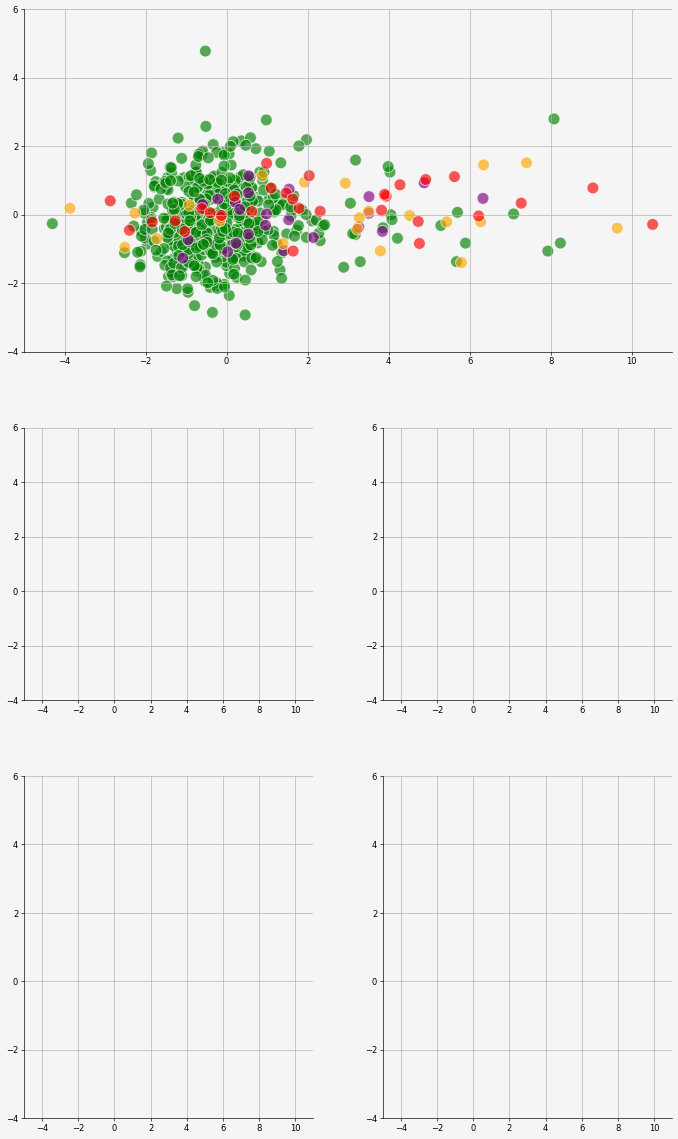

In [31]:
fig = plt.figure(figsize = (24,24), dpi = 60)
gs = GridSpec(ncols=11, nrows=16, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[:5, :])
ax2 = fig.add_subplot(gs[6:10, :5])
ax3 = fig.add_subplot(gs[6:10, 6:])
ax4 = fig.add_subplot(gs[11:, :5])
ax5 = fig.add_subplot(gs[11:, 6:])
# axes list
axes = [ ax1,ax2,ax3,ax4, ax5]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    #ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    ax.grid()
    ax.set_xlim(-5, 11)
    ax.set_ylim(-4, 6)
    for loc in ['right', 'top']:
        ax.spines[loc].set_visible(False)
    
sns.scatterplot(x=X_2d[1], y=X_2d[0], hue=y, s=200, alpha=0.65, ax=ax1, legend=False)


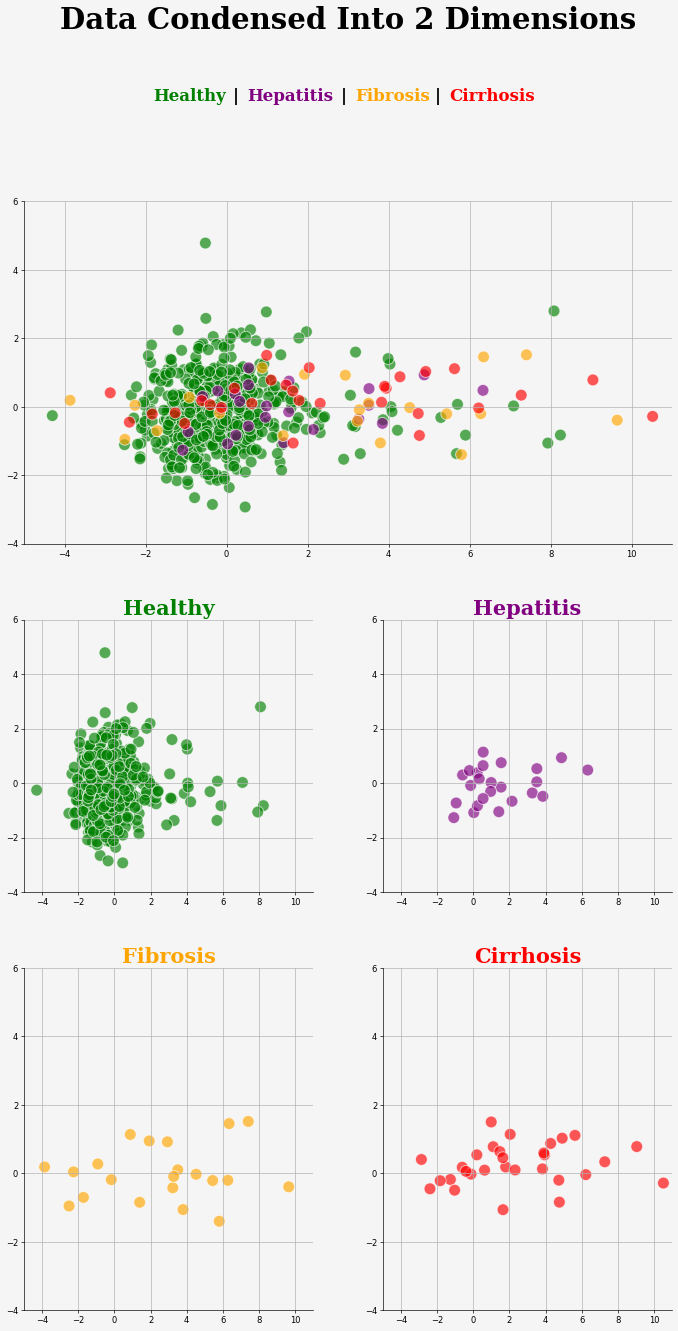

In [32]:
#2d data
fig = plt.figure(figsize = (24,24), dpi = 60)
gs = GridSpec(ncols=11, nrows=16, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[:5, :])
ax2 = fig.add_subplot(gs[6:10, :5])
ax3 = fig.add_subplot(gs[6:10, 6:])
ax4 = fig.add_subplot(gs[11:, :5])
ax5 = fig.add_subplot(gs[11:, 6:])
# axes list
axes = [ ax1,ax2,ax3,ax4, ax5]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    #ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    ax.grid()
    ax.set_xlim(-5, 11)
    ax.set_ylim(-4, 6)
    for loc in ['right', 'top']:
        ax.spines[loc].set_visible(False)
        
        
#-----------------------------------------------------------
#ax1
sns.scatterplot(x=X_2d[1], y=X_2d[0], hue=y, s=200, alpha=0.65, ax=ax1, legend=False)

#-----------------------------------------------------------
#ax2
healthy_ix  = [i for i in range(len(y)) if y[i] == 'Healthy']
sns.scatterplot(x=X_2d[1][healthy_ix], y=X_2d[0][healthy_ix], s=200,
                c=['green' for i in healthy_ix], alpha=0.65, ax=ax2, legend=False)

ax2.set_title('Healthy', {'font':'Serif', 'weight':'bold','color': 'green', 'size':25})
#-----------------------------------------------------------
#ax3
hepatitis_ix  = [i for i in range(len(y)) if y[i] == 'Hepatitis']
sns.scatterplot(x=X_2d[1][hepatitis_ix], y=X_2d[0][hepatitis_ix], s=200,
                c=['purple' for i in hepatitis_ix], alpha=0.65, ax=ax3, legend=False)


ax3.set_title('Hepatitis', {'font':'Serif', 'weight':'bold','color': 'purple', 'size':25})
#-----------------------------------------------------------
#ax4
fibrosis_ix  = [i for i in range(len(y)) if y[i] == 'Fibrosis']
sns.scatterplot(x=X_2d[1][fibrosis_ix], y=X_2d[0][fibrosis_ix], s=200,
                c=['orange' for i in fibrosis_ix], alpha=0.65, ax=ax4, legend=False)


ax4.set_title('Fibrosis', {'font':'Serif', 'weight':'bold','color': 'orange', 'size':25})
#-----------------------------------------------------------
#ax5
cirrhosis_ix  = [i for i in range(len(y)) if y[i] == 'Cirrhosis']
sns.scatterplot(x=X_2d[1][cirrhosis_ix], y=X_2d[0][cirrhosis_ix], s=200,
                c=['red' for i in cirrhosis_ix], alpha=0.65, ax=ax5, legend=False)

ax5.set_title('Cirrhosis', {'font':'Serif', 'weight':'bold','color': 'red', 'size':25})
#-----------------------------------------------------------

fig.text(0.1 + 0.04, 0.95, "Healthy", 
         {'font':'Serif', 'weight':'bold','color': 'green', 'size':20})
fig.text(0.155 + 0.04, 0.95, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.165 + 0.04, 0.95, "Hepatitis", 
         {'font':'Serif', 'weight':'bold','color': 'purple', 'size':20})
fig.text(0.23 + 0.04, 0.95, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.24 + 0.04, 0.95, "Fibrosis", 
         {'font':'Serif', 'weight':'bold','color': 'orange', 'size':20})
fig.text(0.295 + 0.04, 0.95, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.305 + 0.04, 0.95, "Cirrhosis", 
         {'font':'Serif', 'weight':'bold','color': 'red', 'size':20})
fig.text(0.075, 1, 'Data Condensed Into 2 Dimensions', {'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
plt.show()

In [33]:
#plot the 3d dataset
fig = plt.figure(figsize = (24,24), dpi = 60)
gs = GridSpec(ncols=11, nrows=16, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))
fig.text(0.1 + 0.04, 0.88, "Healthy", 
         {'font':'Serif', 'weight':'bold','color': 'green', 'size':20})
fig.text(0.155 + 0.04, 0.88, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.165 + 0.04, 0.88, "Hepatitis", 
         {'font':'Serif', 'weight':'bold','color': 'purple', 'size':20})
fig.text(0.23 + 0.04, 0.88, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.24 + 0.04, 0.88, "Fibrosis", 
         {'font':'Serif', 'weight':'bold','color': 'orange', 'size':20})
fig.text(0.295 + 0.04, 0.88, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.305 + 0.04, 0.88, "Cirrhosis", 
         {'font':'Serif', 'weight':'bold','color': 'red', 'size':20})
fig.text(0.085, 0.95, 'Data Condensed Into 3 Dimensions', {'font':'Serif', 'weight':'bold','color': 'black', 'size':35})

ax1 = fig.add_subplot(gs[:5, :], projection='3d')
ax2 = fig.add_subplot(gs[6:10, :5], projection='3d')
ax3 = fig.add_subplot(gs[6:10, 6:], projection='3d')
ax4 = fig.add_subplot(gs[11:, :5], projection='3d')
ax5 = fig.add_subplot(gs[11:, 6:], projection='3d')
# axes list
axes = [ ax1,ax2,ax3,ax4, ax5]

for ax in axes:
    ax.set_zticks([-3,-2,-1,0,1,2,3], ['' for i in range(7)])
    ax.set_yticks([-3,-2,-1,0,1,2,3,4,5], ['' for i in range(9)])
    ax.set_xticks([-4,-2,0,2,4,6,8,10], ['' for i in range(8)])
    ax.set_zlim(-3.5, 3.5)
    ax.set_ylim(-4, 6)
    ax.set_xlim(-5, 11)

colors =  []
for i in y:
    if i=='Healthy':
        colors.append('green')
    elif i=='Hepatitis':
        colors.append('purple')
    elif i=='Fibrosis':
        colors.append('orange')
    else:
        colors.append('red')
        
def animate(frame_num):
    
    #---------------------------------------------------------------------------------
    #ax1
    ax1.scatter(X_3d[2],X_3d[0],X_3d[1], c=colors, s=[200 for i in colors], alpha=0.5)

    # rotate the axes and update
    ax1.view_init(30, frame_num)
    #---------------------------------------------------------------------------------
    #ax2
    healthy_ix  = [i for i in range(len(y)) if y[i] == 'Healthy']
    ax2.scatter(X_3d[2][healthy_ix],X_3d[0][healthy_ix],X_3d[1][healthy_ix],
                c=['green' for i in healthy_ix], s=[200 for i in healthy_ix], alpha=0.5)

    # rotate the axes and update
    ax2.view_init(30, frame_num)
    ax2.set_title('Healthy', {'font':'Serif', 'weight':'bold','color': 'green', 'size':25})
    #---------------------------------------------------------------------------------
    #ax3
    hepatitis_ix  = [i for i in range(len(y)) if y[i] == 'Hepatitis']
    ax3.scatter(X_3d[2][hepatitis_ix],X_3d[0][hepatitis_ix],X_3d[1][hepatitis_ix],
                c=['purple' for i in hepatitis_ix], s=[200 for i in hepatitis_ix], alpha=0.5)

    # rotate the axes and update
    ax3.view_init(30, frame_num)
    ax3.set_title('Hepatitis', {'font':'Serif', 'weight':'bold','color': 'purple', 'size':25})
    #---------------------------------------------------------------------------------
    #ax4
    fibrosis_ix  = [i for i in range(len(y)) if y[i] == 'Fibrosis']
    ax4.scatter(X_3d[2][fibrosis_ix],X_3d[0][fibrosis_ix],X_3d[1][fibrosis_ix],
                c=['orange' for i in fibrosis_ix], s=[200 for i in fibrosis_ix], alpha=0.5)

    # rotate the axes and update
    ax4.view_init(30, frame_num)
    ax4.set_title('Fibrosis', {'font':'Serif', 'weight':'bold','color': 'orange', 'size':25})
    #---------------------------------------------------------------------------------
    #ax5
    cirrhosis_ix  = [i for i in range(len(y)) if y[i] == 'Cirrhosis']
    ax5.scatter(X_3d[2][cirrhosis_ix],X_3d[0][cirrhosis_ix],X_3d[1][cirrhosis_ix],
                c=['red' for i in cirrhosis_ix], s=[200 for i in cirrhosis_ix], alpha=0.5)

    # rotate the axes and update
    ax5.view_init(30, frame_num)
    ax5.set_title('Cirrhosis', {'font':'Serif', 'weight':'bold','color': 'red', 'size':25})
    #---------------------------------------------------------------------
    
    return plt.gcf()

anim = FuncAnimation(fig, animate, frames=range(0,360), interval=250)
anim.save('3d_condensed.gif', writer='pillow', fps=30)
plt.close() #stops extra plot from appearing

In [34]:
HTML('<img src="./3d_condensed.gif" />')

In [35]:
## Balance Dataset with SMOTE

In [36]:
#converts y to float values
y_float = np.where(y=='Healthy', 0.0, y)
y_float = np.where(y_float=='Hepatitis', 1.0, y_float)
y_float = np.where(y_float=='Fibrosis', 2.0, y_float)
y_float = np.where(y_float=='Cirrhosis', 3.0, y_float).astype('float64')
#splits data into train, validation, and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_float, test_size=0.3, random_state=8)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=8)


#SMOTE for class balancing
sm = SMOTE(random_state=8)

#create new training set with SMOTE object
X_bal, y_bal = sm.fit_resample(X_train, y_train)

for i in X_train:
    print(i)

[ 0.15844346 -0.45364122  0.09136484  3.51877867  0.82306565 -0.07105547
 -0.4159215  -1.65056771 -0.18681836  0.63106859  1.65903563  0.        ]
[ 0.55657514  1.00067252 -0.05321436 -0.16310363 -0.06612498  0.17821771
  1.04968662  0.58482555 -0.00578901 -0.26243243  0.5475611   1.        ]
[ 1.05423974 -0.1246893  -0.48003062 -0.43030533 -0.35647294 -0.31015423
  0.14672682  0.92057632  0.23558344 -0.38510573 -0.21194649  0.        ]
[-1.53361617  0.27351565 -0.6261479   0.08445089 -0.36857077  0.38170602
 -0.39323407 -0.55495995 -0.02590339 -0.10497119  0.67723313  0.        ]
[ 0.15844346 -0.48826773  1.99627272 -0.1277387  -0.40183981  0.03068868
  0.04236463  1.53906457 -0.58910578 -0.38327479 -0.24899564  1.        ]
[ 1.15377266 -3.8643532   5.38004127 11.66450118  3.38175704 -0.22875891
 -1.30073136 -0.57263104 -0.99139321  4.68844211 -3.5093209   1.        ]
[ 1.95003601 -0.50558099  0.59662301 -0.35564603 -0.27178812 -0.13718917
 -0.11190991  0.14304823  0.37638404 -0.41989

In [37]:
for i in y_train:
    print(i)

2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
2.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
3.0
1.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
3.0
1.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
3.0
3.0
0.0
1.0
3.0
2.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [38]:
for i in X_test:
    print(i)

[ 1.35283849  0.74097364  0.1928779  -0.44602308 -0.31715498 -0.33559027
  0.8228123  -0.36941347  0.13501159 -0.29355849 -0.23047106  0.        ]
[-0.83688573  0.60246757 -0.1685701  -0.0963032  -0.40788872 -0.10666593
  0.16941425 -0.11318262 -0.04601776 -0.18553276 -0.15637276  0.        ]
[-1.43408325  1.03529904  1.04651042 -0.37922265 -0.3806686  -0.45768326
 -0.16182226  0.17839041 -0.20693273 -0.41440085  0.5475611   1.        ]
[-0.83688573 -0.86915943  0.11597407  0.01765047 -0.26876366 -0.26945657
 -1.13284436 -0.62564432 -0.0862465  -0.310037   -1.06407695  0.        ]
[ 0.55657514  0.49858802 -0.27239028 -0.55211787 -0.50467137 -0.17279963
 -0.56565856 -0.32523574 -0.2270471  -0.38876762 -0.00817616  0.        ]
[-0.23968822 -2.1849671  -2.19114085 -0.83896676  2.02982435  0.99725816
 -2.93422649 -1.46502123 -0.09228081  0.47726924 -0.37866766  0.        ]
[-1.23501741  1.62394984  0.5543259   0.03336821 -0.24154354 -0.13718917
  1.87097167  0.06352831  0.15512596 -0.26609

In [39]:
for i in y_test:
    print(i)

0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0


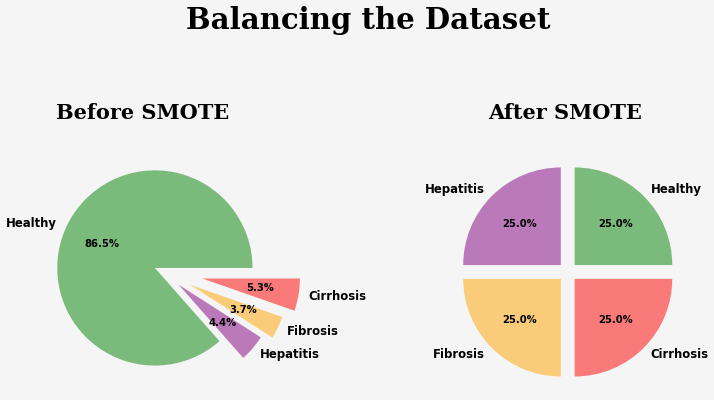

In [40]:
#plots target data
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=13, nrows=5, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[:, 0:5])
ax2 = fig.add_subplot(gs[:, 8:])


# axes list
axes = [ ax1,ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

#------------------------------------------------------------    
#ax1
pre_smote_count = [len(y_train[y_train==0.0]), len(y_train[y_train==1.0]),
                  len(y_train[y_train==2.0]), len(y_train[y_train==3.0])]
ax1_plot = ax1.pie(pre_smote_count, 
                   labels=['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                    autopct='%1.1f%%', explode=[0.1,  0.2, 0.3, 0.4], 
                   colors=['green', 'purple', 'orange', 'red'])

for piece in ax1_plot[0]:
    piece.set_alpha(0.5)

for i, text in enumerate(ax1_plot[1]):
    text.set_weight('bold')
    text.set_size(14)

for i, text in enumerate(ax1_plot[2]):
    text.set_weight('bold')
    text.set_size(12)

    
fig.text(0.06, 0.75, 'Before SMOTE',  {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
#------------------------------------------------------------    
#ax2
post_smote_count = [len(y_bal[y_bal==0.0]), len(y_bal[y_bal==1.0]),
                  len(y_bal[y_bal==2.0]), len(y_bal[y_bal==3.0])]
ax2_plot = ax2.pie(post_smote_count, 
                   labels=['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                    autopct='%1.1f%%', explode=[0.1,  0.1, 0.1, 0.1], 
                   colors=['green', 'purple', 'orange', 'red'])

for piece in ax2_plot[0]:
    piece.set_alpha(0.5)

for i, text in enumerate(ax2_plot[1]):
    text.set_weight('bold')
    text.set_size(14)

for i, text in enumerate(ax2_plot[2]):
    text.set_weight('bold')
    text.set_size(12)

fig.text(0.36, 0.75, 'After SMOTE',  {'font':'Serif', 'weight':'bold','color': 'black', 'size':25}) 
#--------------------------------
fig.text(0.15, 0.9, 'Balancing the Dataset',
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':35}) 
plt.show()

##  Model Creation and Hyperparameter Optimization with OPTUNA

In [41]:
# OPTUNA objective function
def objective(trial):
    #------------------------------
    #logistic regression
    lr_penalty = trial.suggest_categorical('lr_penalty', ['l1', 'l2', 'elasticnet'])
    lr_l1_ratio = None
    if lr_penalty == 'l1':
        lr_solver = trial.suggest_categorical('lr_solver1', ['liblinear', 'saga'])
    elif lr_penalty == 'l2':
        lr_solver = trial.suggest_categorical('lr_solver2', ['newton-cg', 'lbfgs', 'sag', 'liblinear', 'saga'])
    else:
        lr_solver = 'saga'
        lr_l1_ratio = trial.suggest_uniform('lr_l1_ratio', 0.0, 1.0)
    
    lr_tol = trial.suggest_uniform('lr_tol', 1e-5, 1e-2)
    lr_C = trial.suggest_uniform('lr_C', 0.0, 1.0)
    
    lr = LogisticRegression(
        penalty=lr_penalty,
        tol=lr_tol,
        C=lr_C,
        solver=lr_solver,
        l1_ratio=lr_l1_ratio
    )
    

    #----------------------------------------------------------
    #KNN
    knn_neighbors = trial.suggest_int('knn_neighbors', 2, 100)
    knn_weights = trial.suggest_categorical('knn_weights', ['uniform', 'distance'])
    knn_p = trial.suggest_categorical('knn_p', [1, 2])
    
    knn = KNeighborsClassifier(
        n_neighbors=knn_neighbors,
        weights=knn_weights,
        p=knn_p
    )
   

    #----------------------------------------------------------
    #SVM
    svm_C = trial.suggest_uniform('svm_C', 0.0, 1.0)
    svm_kernel = trial.suggest_categorical('svm_kernel', ['poly', 'rbf'])
    svm_degree = 3
    if svm_kernel == 'poly':
        svm_degree = trial.suggest_int('svm_degree', 1, 10)
    svm_tol = trial.suggest_uniform('svm_tol', 1e-5, 1e-2)
    
    svm = SVC(
        C=svm_C,
        kernel=svm_kernel,
        degree=svm_degree,
        tol=svm_tol
    )
    
    #-----------------------------------------------------------
    #random forest
    rf_estimators = trial.suggest_int('rf_estimators', 1, 500)
    rf_criterion = trial.suggest_categorical('rf_criterion', ['entropy', 'gini'])
    rf_max_depth = trial.suggest_int('rf_max_depth', 1, 100)
    rf_min_samples_split = trial.suggest_int('rf_min_samples_split', 2, 50)
    rf_min_samples_leaf = trial.suggest_int('rf_min_samples_leaf', 1, 25)
    
    rf = RandomForestClassifier(
        n_estimators=rf_estimators,
        criterion=rf_criterion,
        max_depth=rf_max_depth,
        min_samples_split=rf_min_samples_split,
        min_samples_leaf=rf_min_samples_leaf
    )
    
    
    #---------------------------------------------------------
    #naive bayes
    nb_smoothing = trial.suggest_uniform('nb_smoothing', 1e-10, 1e-6)
    nb = GaussianNB(var_smoothing=nb_smoothing)
    
 
    #---------------------------------------------------------

    #ensemble model
    lr_w = trial.suggest_uniform('lr_w', 0.0, 1.0)
    knn_w = trial.suggest_uniform('knn_w', 0.0, 1.0)
    svm_w = trial.suggest_uniform('svm_w', 0.0, 1.0)
    rf_w = trial.suggest_uniform('rf_w', 0.0, 1.0)
    nb_w = trial.suggest_uniform('nb_w', 0.0, 1.0)

    
    vc = VotingClassifier(estimators=[
        ('lr', lr),
        ('knn', knn),
        ('svm', svm),
        ('rf', rf),
        ('nb', nb)],
                          weights=[lr_w, knn_w, svm_w, rf_w, nb_w]
                         )

    vc.fit(X_bal, y_bal)
    preds = vc.predict(X_val)
    
    acc = metrics.accuracy_score(y_val, preds)

    return acc

In [42]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

In [43]:
# !pip install graphviz

In [44]:
# ensemble_graph = graphviz.Digraph()
# #first layer
# ensemble_graph.edge('data', 'Logistic Regression')
# ensemble_graph.edge('data', 'KNN')
# ensemble_graph.edge('data', 'SVM')
# ensemble_graph.edge('data', 'Random Forest')
# ensemble_graph.edge('data', 'Naive Bayes')
# #second layer
# ensemble_graph.edge('Logistic Regression', 'Ensemble Voter')
# ensemble_graph.edge('KNN', 'Ensemble Voter')
# ensemble_graph.edge('SVM', 'Ensemble Voter')
# ensemble_graph.edge('Random Forest', 'Ensemble Voter')
# ensemble_graph.edge('Naive Bayes', 'Ensemble Voter')
# #third layer
# ensemble_graph.edge('Ensemble Voter', 'prediction')

# ensemble_graph

In [45]:

print('Model Accuracy on Valadation Set:', round(study.best_trial.values[0], 2))

print('===========================================================')

print('Best Hyperparameters:')
print(study.best_params)

Model Accuracy on Valadation Set: 0.96
Best Hyperparameters:
{'lr_penalty': 'elasticnet', 'lr_l1_ratio': 0.12338798293717114, 'lr_tol': 0.0072621894892948395, 'lr_C': 0.8098996418759361, 'knn_neighbors': 77, 'knn_weights': 'distance', 'knn_p': 2, 'svm_C': 0.21734790102723026, 'svm_kernel': 'poly', 'svm_degree': 8, 'svm_tol': 0.001963848507331312, 'rf_estimators': 431, 'rf_criterion': 'gini', 'rf_max_depth': 26, 'rf_min_samples_split': 19, 'rf_min_samples_leaf': 17, 'nb_smoothing': 2.982859986744066e-07, 'lr_w': 0.808977029618023, 'knn_w': 0.7894240038154771, 'svm_w': 0.8240294300894475, 'rf_w': 0.49939233931578453, 'nb_w': 0.005199947940571162}


In [46]:
#recreates a model from the best hyperparameters:
def create_model(best_params):
        #------------------------------
    try:
        l1_ratio = best_params['lr_l1_ratio']
    except:
        l1_ratio = None
    try:
        solver = best_params['lr_solver1']
    except:
        try:
            solver = best_params['lr_solver2']
        except:
            solver = 'saga'
    
    lr = LogisticRegression(
        penalty=best_params['lr_penalty'],
        tol=best_params['lr_tol'],
        C=best_params['lr_C'],
        l1_ratio=l1_ratio,
        solver=solver
    )
    

    #----------------------------------------------------------
    #KNN
    
    knn = KNeighborsClassifier(
        n_neighbors=best_params['knn_neighbors'],
        weights=best_params['knn_weights'],
        p=best_params['knn_p']
    )
   

    #----------------------------------------------------------
    #SVM
    try:
        svm_degree = best_params['svm_degree']
    except:
        svm_degree=3
        
    svm = SVC(
        C=best_params['svm_C'],
        kernel=best_params['svm_kernel'],
        degree=svm_degree,
        tol=best_params['svm_tol']
    )
    
    #-----------------------------------------------------------
    #random forest
    rf = RandomForestClassifier(
        n_estimators=best_params['rf_estimators'],
        criterion=best_params['rf_criterion'],
        max_depth=best_params['rf_max_depth'],
        min_samples_split=best_params['rf_min_samples_split'],
        min_samples_leaf=best_params['rf_min_samples_leaf']
    )
    
    
    #---------------------------------------------------------
    #naive bayes
    nb = GaussianNB(var_smoothing=best_params['nb_smoothing'])
    
 
    #---------------------------------------------------------

    #ensemble model    
    vc = VotingClassifier(estimators=[
        ('lr', lr),
        ('knn', knn),
        ('svm', svm),
        ('rf', rf),
        ('nb', nb)],
                          weights=[
                              best_params['lr_w'],
                              best_params['knn_w'],
                              best_params['svm_w'],
                              best_params['rf_w'],
                              best_params['nb_w']]
                         )

    vc.fit(X_bal, y_bal)
    
    return vc

In [47]:
#ensemble model with best hyperparameters
model = create_model(study.best_params)

## Model Evaluation on Test Set and Explination with SHAP

In [48]:
#creates shap explainer
feature_names = list(data.columns)[1:2] + list(data.columns)[3:] + [list(data.columns)[2]]
explainer = shap.Explainer(model.predict, X_train, feature_names=feature_names)
shap_values = explainer(X_test)

In [49]:
#plots importance of each feature
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [50]:
#plots importance of each feature
shap.summary_plot(shap_values, X_test)

In [51]:
#plots effect of the AST feature
shap.partial_dependence_plot(4, model.predict, X_test, feature_names=feature_names)

In [52]:
#displays the final evaluation for training data
train_preds = model.predict(X_train)
print('Training Accuracy:', round(metrics.accuracy_score(y_train, train_preds), 2))

Training Accuracy: 1.0


In [53]:
#displays the final evaluation for testing data
test_preds = model.predict(X_test)
print('Test Accuracy:', round(metrics.accuracy_score(y_test, test_preds), 2))

Test Accuracy: 0.91


In [54]:
check=X_train[0]

In [55]:
check1=X_test[5]

In [56]:
check

array([ 0.15844346, -0.45364122,  0.09136484,  3.51877867,  0.82306565,
       -0.07105547, -0.4159215 , -1.65056771, -0.18681836,  0.63106859,
        1.65903563,  0.        ])

In [57]:
check1

array([-0.23968822, -2.1849671 , -2.19114085, -0.83896676,  2.02982435,
        0.99725816, -2.93422649, -1.46502123, -0.09228081,  0.47726924,
       -0.37866766,  0.        ])

In [58]:
for i in X_test:
    print(i)

[ 1.35283849  0.74097364  0.1928779  -0.44602308 -0.31715498 -0.33559027
  0.8228123  -0.36941347  0.13501159 -0.29355849 -0.23047106  0.        ]
[-0.83688573  0.60246757 -0.1685701  -0.0963032  -0.40788872 -0.10666593
  0.16941425 -0.11318262 -0.04601776 -0.18553276 -0.15637276  0.        ]
[-1.43408325  1.03529904  1.04651042 -0.37922265 -0.3806686  -0.45768326
 -0.16182226  0.17839041 -0.20693273 -0.41440085  0.5475611   1.        ]
[-0.83688573 -0.86915943  0.11597407  0.01765047 -0.26876366 -0.26945657
 -1.13284436 -0.62564432 -0.0862465  -0.310037   -1.06407695  0.        ]
[ 0.55657514  0.49858802 -0.27239028 -0.55211787 -0.50467137 -0.17279963
 -0.56565856 -0.32523574 -0.2270471  -0.38876762 -0.00817616  0.        ]
[-0.23968822 -2.1849671  -2.19114085 -0.83896676  2.02982435  0.99725816
 -2.93422649 -1.46502123 -0.09228081  0.47726924 -0.37866766  0.        ]
[-1.23501741  1.62394984  0.5543259   0.03336821 -0.24154354 -0.13718917
  1.87097167  0.06352831  0.15512596 -0.26609

In [59]:

for i in X_train:
    print(i)

[ 0.15844346 -0.45364122  0.09136484  3.51877867  0.82306565 -0.07105547
 -0.4159215  -1.65056771 -0.18681836  0.63106859  1.65903563  0.        ]
[ 0.55657514  1.00067252 -0.05321436 -0.16310363 -0.06612498  0.17821771
  1.04968662  0.58482555 -0.00578901 -0.26243243  0.5475611   1.        ]
[ 1.05423974 -0.1246893  -0.48003062 -0.43030533 -0.35647294 -0.31015423
  0.14672682  0.92057632  0.23558344 -0.38510573 -0.21194649  0.        ]
[-1.53361617  0.27351565 -0.6261479   0.08445089 -0.36857077  0.38170602
 -0.39323407 -0.55495995 -0.02590339 -0.10497119  0.67723313  0.        ]
[ 0.15844346 -0.48826773  1.99627272 -0.1277387  -0.40183981  0.03068868
  0.04236463  1.53906457 -0.58910578 -0.38327479 -0.24899564  1.        ]
[ 1.15377266 -3.8643532   5.38004127 11.66450118  3.38175704 -0.22875891
 -1.30073136 -0.57263104 -0.99139321  4.68844211 -3.5093209   1.        ]
[ 1.95003601 -0.50558099  0.59662301 -0.35564603 -0.27178812 -0.13718917
 -0.11190991  0.14304823  0.37638404 -0.41989

In [60]:
for j in y_train:
    print(j)

2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
2.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
3.0
1.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
3.0
1.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
3.0
3.0
0.0
1.0
3.0
2.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [61]:
print("Now predict for check:",model.predict([check]))

Now predict for check: [2.]


In [62]:
print("Now predict for check1:",model.predict([check1]))

Now predict for check1: [3.]


In [63]:
def predict_liver_disease_stage(age, sex, alb, alp, alt, ast, bil, che, chol, crea, ggt, prot):
    # Convert sex to numerical value
    gender_map1 = {'m': 0, 'f': 1}
    sex_numeric1 = gender_map1[sex]

    # Assemble input data into a numpy array
    input_data = np.array([[age, sex_numeric1, alb, alp, alt, ast, bil, che, chol, crea, ggt, prot]])
   
    # Scale and impute missing values
    input_data_processed = pipeline.transform(input_data)
    print(input_data_processed)

    # Predict using the pre-trained model
    predicted_category = model.predict(input_data_processed)

    # Map predicted category back to its original label
    category_map = {0.0: 'Blood Donor or suspected Blood Donar', 1.0: 'Hepatitis', 2.0: 'Fibrosis', 3.0: 'Cirrhosis'}
    predicted_category_label = category_map[predicted_category[0]]

    return predicted_category_label


In [64]:
# 1.35283849  1.45081725 -1.30290161 -0.04129109  2.40788159  0.53940946
#   0.58232552 -0.6609865  -0.38997351  2.38511364  2.58526439
def predict_liver_disease_from_user_input():
    # Ask user for input
    age = int(input("Enter age: "))
    sex = input("Enter sex (m/f): ")
    alb = float(input("Enter amount of albumin in blood: "))
    alp = float(input("Enter amount of alkaline phosphatase in blood: "))
    alt = float(input("Enter amount of alanine transaminase in blood: "))
    ast = float(input("Enter amount of aspartate aminotransferase in blood: "))
    bil = float(input("Enter amount of bilirubin in blood: "))
    che = float(input("Enter amount of cholinesterase in blood: "))
    chol = float(input("Enter amount of cholesterol in blood: "))
    crea = float(input("Enter amount of creatine in blood: "))
    ggt = float(input("Enter amount of gamma-glutamyl transferase in blood: "))
    prot = float(input("Enter amount of protein in blood: "))

    # Call predict_liver_disease_stage function with user input
    predicted_category = predict_liver_disease_stage(age, sex, alb, alp, alt, ast, bil, che, chol, crea, ggt, prot)

    print("Predicted Liver Disease Stage:", predicted_category)

# Call the function to start prediction based on user input
predict_liver_disease_from_user_input()

Enter age: 42
Enter sex (m/f): f
Enter amount of albumin in blood: 33
Enter amount of alkaline phosphatase in blood: 79
Enter amount of alanine transaminase in blood: 3.7
Enter amount of aspartate aminotransferase in blood: 55.7
Enter amount of bilirubin in blood: 200
Enter amount of cholinesterase in blood: 1.72
Enter amount of cholesterol in blood: 5.16
Enter amount of creatine in blood: 89.1
Enter amount of gamma-glutamyl transferase in blood: 146.3
Enter amount of protein in blood: 69.9
[[-0.53828698 -1.49243674  0.41205382 -0.97256761  0.6325248   9.59463925
  -2.93876398 -0.18386699  0.15713739  1.95484163 -0.39719224  1.        ]]
Predicted Liver Disease Stage: Cirrhosis


In [65]:
# #creates lower dimension dataset to visualize multiple features at once
# #first preprocess data
# #sets Sex to 0 (m) or 1 (f)
# def Preprocessing(age, sex, alb, alp, alt, ast, bil, che, chol, crea, ggt, prot):
#     gender_map = {'m': 0, 'f': 1}
#     data['Sex'] = data.Sex.map(gender_map)
#     sex_numeric = gender_map[sex]
#     input_data = np.array([[age, sex_numeric, alb, alp, alt, ast, bil, che, chol, crea, ggt, prot]])


#     #creates pipeline for data processing
#     ct = ColumnTransformer([
#         ('scaler', StandardScaler(), [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
#     ], remainder='passthrough')

#     knn_imp = KNNImputer(n_neighbors=5) # we use it for multivariate imputation
#                                         # We are using this imputation because we 
#                                         # are working with smaller dataset
#                                         # Mostly it gives better result than mean and median
#     pipeline = Pipeline([
#         ('scale', ct),
#         ('impute', knn_imp)
#     ])
#     # Since we are not training the model here so we have used here fit_transform 
#     # but if we train the model also then we can use fit only
#     #  So we have two kinds of pipeline:
#     #         1) .fit_transform
#     #         2) .fit
#     print(data.iloc[:, 1:])

#     # Now we put the data into the Input X data  pipeline
#     X = pipeline.fit_transform(data.iloc[:, 1:].values)
#     check_h=pipeline.fit_transform(input_data)
#     y = data.Category.values

#     # For data visualization we are using Feature extraction using PCA 
#     # pca_1d = PCA(n_components=1)
#     # pca_2d = PCA(n_components=2)
#     # pca_3d = PCA(n_components=3)

#     # X_1d = pca_1d.fit_transform(X).reshape(1,-1)[0]
#     # X_2d = pca_2d.fit_transform(X).reshape(2, -1)
#     # X_3d = pca_3d.fit_transform(X).reshape(3, -1)


In [ ]:
# import unittest
# import numpy as np

# class TestLiverDiseasePrediction(unittest.TestCase):
    
#     def test_predict_liver_disease_stage(self):
#         # Test case 1: Predicting liver disease stage for a male individual with normal biomarker levels
#         predicted_category = predict_liver_disease_stage(40, 'm', 4.0, 100, 50, 30, 0.5, 3000, 200, 1.0, 50, 7.5)
#         self.assertEqual(predicted_category, 'Blood Donor or suspected Blood Donar')
        
#         # Test case 2: Predicting liver disease stage for a female individual with abnormal biomarker levels
#         predicted_category = predict_liver_disease_stage(50, 'f', 3.0, 200, 80, 40, 2.0, 1500, 250, 0.8, 80, 6.0)
#         self.assertEqual(predicted_category, 'Cirrhosis')
        
#     def test_predict_liver_disease_from_user_input(self):
#         # Test case 1: Providing user input for a male individual with normal biomarker levels
#         user_input = (40, 'm', 4.0, 100, 50, 30, 0.5, 3000, 200, 1.0, 50, 7.5)
#         predicted_category = predict_liver_disease_from_user_input(*user_input)
#         self.assertEqual(predicted_category, 'Predicted Liver Disease Stage: Blood Donor or suspected Blood Donar')

#         # Test case 2: Providing user input for a female individual with abnormal biomarker levels
#         user_input = (50, 'f', 3.0, 200, 80, 40, 2.0, 1500, 250, 0.8, 80, 6.0)
#         predicted_category = predict_liver_disease_from_user_input(*user_input)
#         self.assertEqual(predicted_category, 'Predicted Liver Disease Stage: Cirrhosis')

# if __name__ == '__main__':
#     unittest.main()


In [ ]:
# def Unit_testing():
#     gender_map = {'m': 0, 'f': 1}
#     data['Sex'] = data.Sex.map(gender_map)

#     #creates pipeline for data processing
#     ct = ColumnTransformer([
#         ('scaler', StandardScaler(), [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
#     ], remainder='passthrough')

#     knn_imp = KNNImputer(n_neighbors=5) 
#         ('scale', ct),
#         ('impute', knn_imp)
#     ])
   
#     print(data.iloc[:, 1:])

#     # Now we put the data into the Input X data  pipeline
#     X = pipeline.fit_transform(data.iloc[:, 1:].values)
#     y = data.Category.values


In [68]:
# def Inte1():
#         #maps target feature 
#     target_map = {'0=Blood Donor': 'Healthy',
#                  '0s=suspect Blood Donor': 'Healthy', #suspects are binned with blood donors for simplicity
#                  '1=Hepatitis': 'Hepatitis',
#                  '2=Fibrosis': 'Fibrosis',
#                  '3=Cirrhosis': 'Cirrhosis'}


#     data['Category'] = data.Category.map(target_map)

IndentationError: expected an indented block (2624600888.py, line 1)